#  Car Price Prediction ‚Äî End-to-End Machine Learning Project
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com

## 1. Project Overview
The objective of this project is to develop a machine learning model that predicts the selling price of used cars based on their characteristics, such as brand, year of manufacture, mileage, fuel type, and more.

Accurate price prediction is valuable for:
- **Dealerships**: Setting fair, competitive prices to attract buyers while maintaining profitability.
- **Car owners**: Understanding the fair market value before selling.
- **Online platforms**: Enhancing recommendation systems and improving buyer-seller trust.

## 2. Problem Statement
*"Given a dataset of used cars with various attributes, predict the selling price for a new car listing with minimal error."*

## 3. Dataset Provenance
- **Source**: [Insert dataset source link here]
- **Type**: CSV file, includes both numeric and categorical features.
- **Licensing**: [State licensing or usage rights]
- **Assumptions**: Prices are in local currency, recorded at listing time.



In [1]:
#  Environment Setup & Imports

# Core data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Utilities
import os
import warnings
warnings.filterwarnings('ignore')

# Plotting style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print(" Environment ready. Random seed set to", RANDOM_STATE)


 Environment ready. Random seed set to 42


In [2]:
df = pd.read_csv("CARPRICE.csv")
print(f"Dataset loaded successfully. Shape: {df.shape}")
display(df.head())

df_raw = df.copy()


Dataset loaded successfully. Shape: (6019, 13)


Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0  98.14   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0  70.73   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   0.95   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0  78.04   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0  77.82   

     Tax  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [3]:
# Column data types & non-null counts
print(" Data Types & Non-null Counts:")
display(df.info())

# Check missing values (sorted by count)
missing_values = df.isnull().sum().sort_values(ascending=False)
print("\n Missing Values:")
display(missing_values[missing_values > 0])

# Check duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\n Duplicate Rows: {duplicate_count}")

# Basic statistical summary for numeric columns
print("\n Numeric Feature Summary:")
display(df.describe().T)

# Unique values for each column (useful for spotting categorical features)
unique_counts = df.nunique().sort_values(ascending=False)
print("\n Unique Values Per Column:")
display(unique_counts)


 Data Types & Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
 12  Tax                6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 611.4+ KB


None


 Missing Values:


Power      143
Seats       42
Engine      36
Mileage      2
dtype: int64


 Duplicate Rows: 0

 Numeric Feature Summary:


count          mean           std      min       25%  \
Year               6019.0   2013.358199      3.269742  1998.00   2011.00   
Kilometers_Driven  6019.0  58738.380296  91268.843206   171.00  34000.00   
Mileage            6017.0     18.134961      4.582289     0.00     15.17   
Engine             5983.0   1621.276450    601.355233    72.00   1198.00   
Power              5876.0    113.253050     53.874957    34.20     75.00   
Seats              5977.0      5.278735      0.808840     0.00      5.00   
Price              6019.0     50.278654     28.884000     0.00     25.15   
Tax                6019.0      9.479468     11.187917     0.44      3.50   

                        50%       75%         max  
Year                2014.00   2016.00     2019.00  
Kilometers_Driven  53000.00  73000.00  6500000.00  
Mileage               18.15     21.10       33.54  
Engine              1493.00   1984.00     5998.00  
Power                 97.70    138.10      560.00  
Seats                  5.00      5.00       10.00  
Price                 50.60     75.56       99.99  
Tax                    5.64      9.95      160.00


 Unique Values Per Column:


Price                4539
Kilometers_Driven    3093
Name                 1876
Tax                  1373
Mileage               430
Power                 369
Engine                146
Year                   22
Location               11
Seats                   9
Fuel_Type               5
Owner_Type              4
Transmission            2
dtype: int64

 Target 'Price' Summary:


count    6019.000000
mean       50.278654
std        28.884000
min         0.000000
25%        25.150000
50%        50.600000
75%        75.560000
max        99.990000
Name: Price, dtype: float64

 Skewness: -0.01


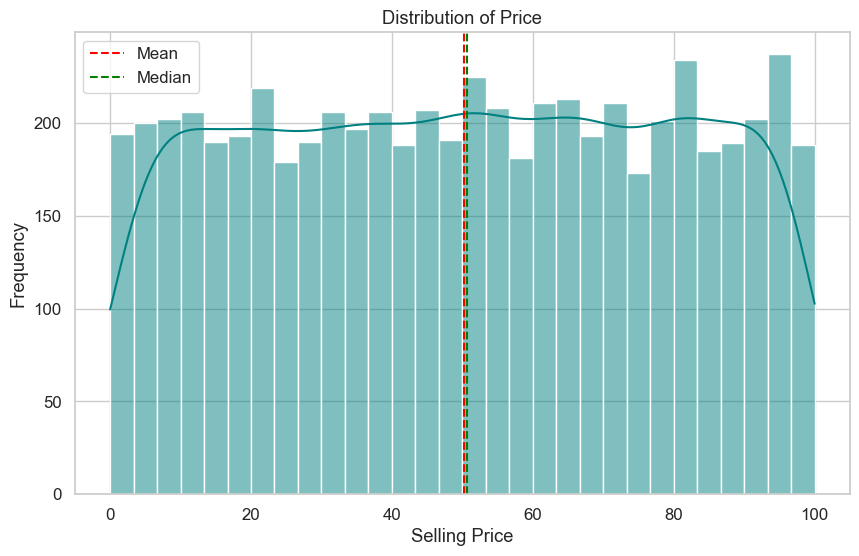

In [4]:
TARGET_COL = "Price"  

if TARGET_COL not in df.columns:
    raise ValueError(f" Target column '{TARGET_COL}' not found in dataset.")

# Basic statistics
print(f" Target '{TARGET_COL}' Summary:")
display(df[TARGET_COL].describe())

# Check skewness
skew_value = df[TARGET_COL].skew()
print(f" Skewness: {skew_value:.2f}")

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(df[TARGET_COL], kde=True, bins=30, color='teal')
plt.title(f"Distribution of {TARGET_COL}")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.axvline(df[TARGET_COL].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df[TARGET_COL].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.show()

# Log-transform suggestion if skew is high
if abs(skew_value) > 1:
    print(" Target is highly skewed. Consider applying a log transformation for modeling.")


 Numeric columns (7): ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Tax']


count          mean           std      min       25%  \
Year               6019.0   2013.358199      3.269742  1998.00   2011.00   
Kilometers_Driven  6019.0  58738.380296  91268.843206   171.00  34000.00   
Mileage            6017.0     18.134961      4.582289     0.00     15.17   
Engine             5983.0   1621.276450    601.355233    72.00   1198.00   
Power              5876.0    113.253050     53.874957    34.20     75.00   
Seats              5977.0      5.278735      0.808840     0.00      5.00   
Tax                6019.0      9.479468     11.187917     0.44      3.50   

                        50%       75%         max  
Year                2014.00   2016.00     2019.00  
Kilometers_Driven  53000.00  73000.00  6500000.00  
Mileage               18.15     21.10       33.54  
Engine              1493.00   1984.00     5998.00  
Power                 97.70    138.10      560.00  
Seats                  5.00      5.00       10.00  
Tax                    5.64      9.95      160.00


 Skewness of Numeric Features:
Year: -0.85
Kilometers_Driven: 58.72
Mileage: -0.43
Engine: 1.42
Power: 1.92
Seats: 1.84
Tax: 3.34


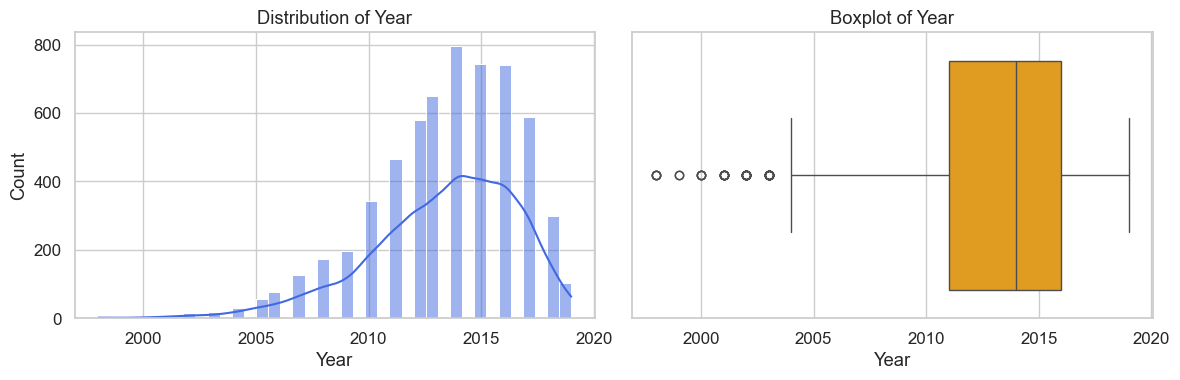

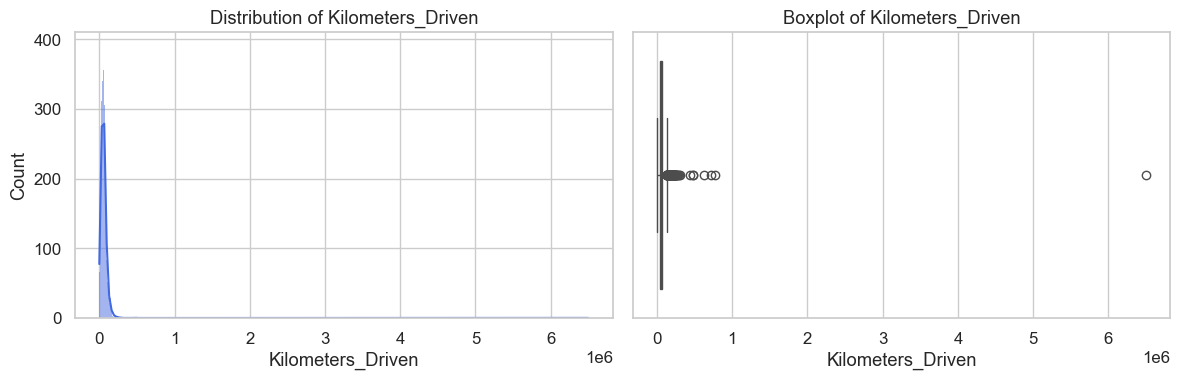

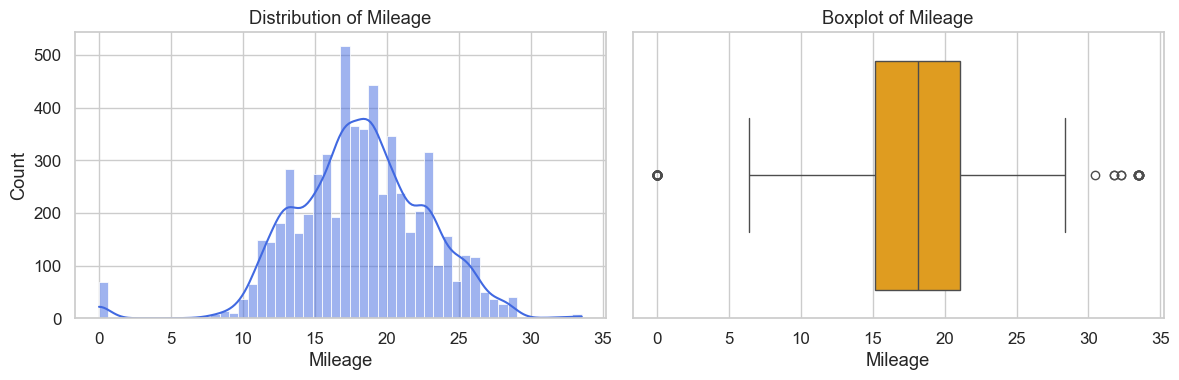

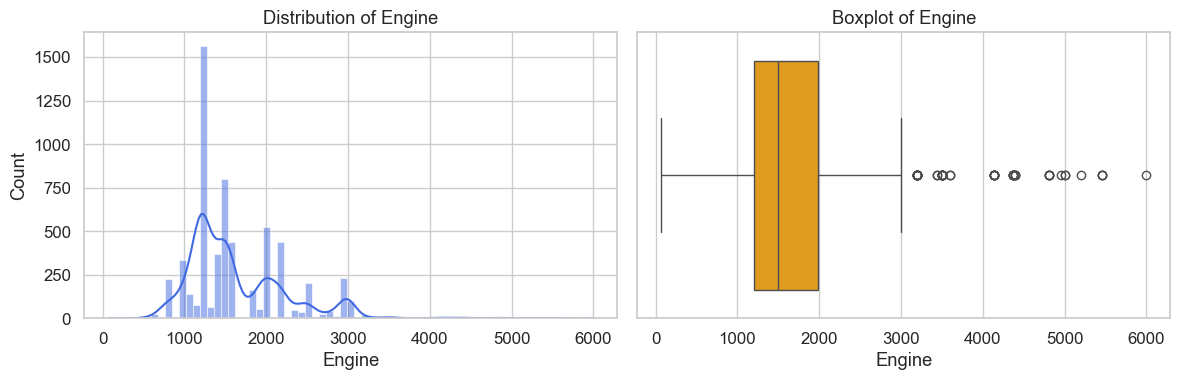

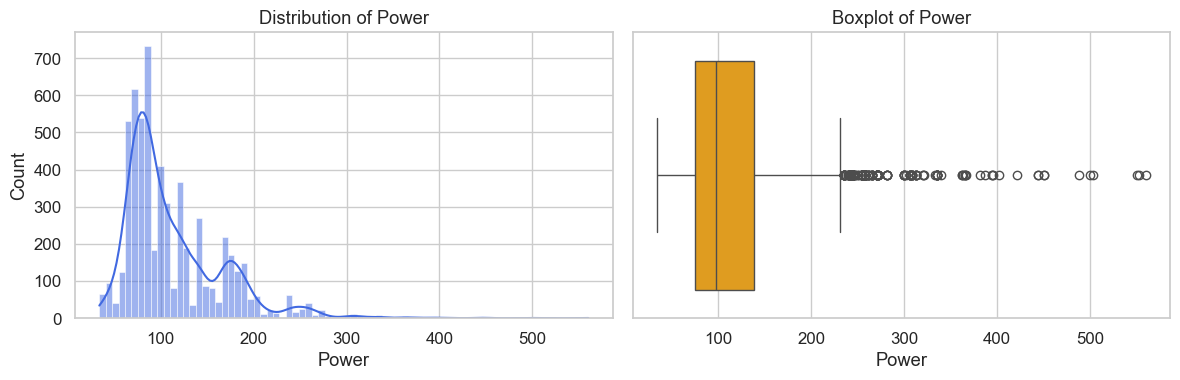

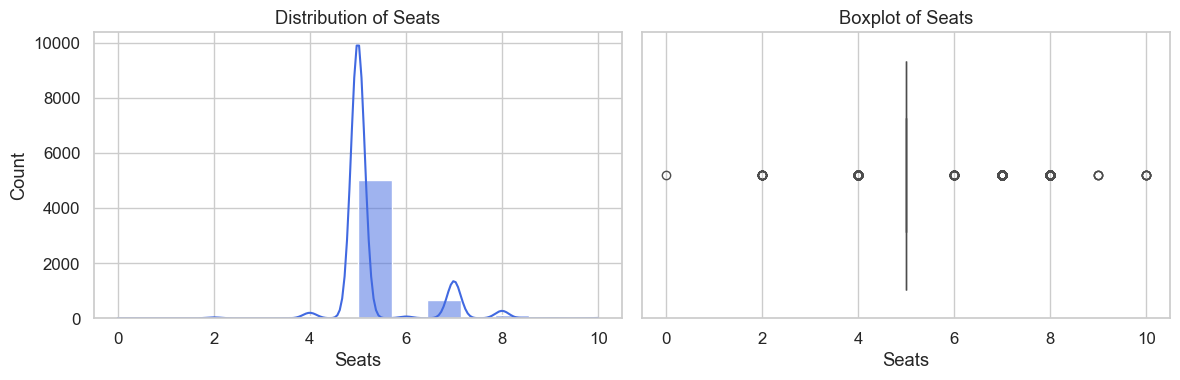

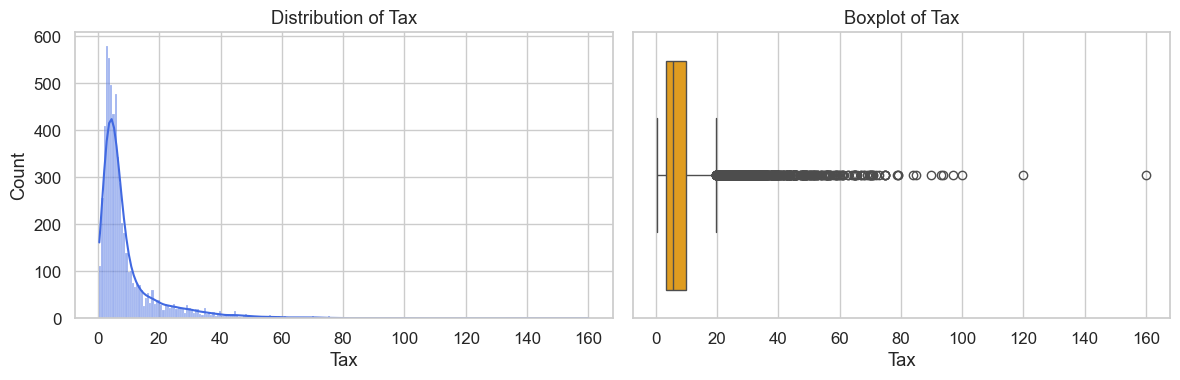

In [5]:
# Select numeric columns excluding target
numeric_cols = df.select_dtypes(include=np.number).columns.drop(TARGET_COL, errors='ignore')

print(f" Numeric columns ({len(numeric_cols)}): {list(numeric_cols)}")

# Summary statistics
display(df[numeric_cols].describe().T)

# Skewness check for all numeric features
print("\n Skewness of Numeric Features:")
for col in numeric_cols:
    print(f"{col}: {df[col].skew():.2f}")

# Plot distributions & boxplots for outlier detection
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[col], kde=True, ax=axes[0], color="royalblue")
    axes[0].set_title(f"Distribution of {col}")

    sns.boxplot(x=df[col], ax=axes[1], color="orange")
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


üè∑ Top 10 Brands by Count:


Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Name: count, dtype: int64

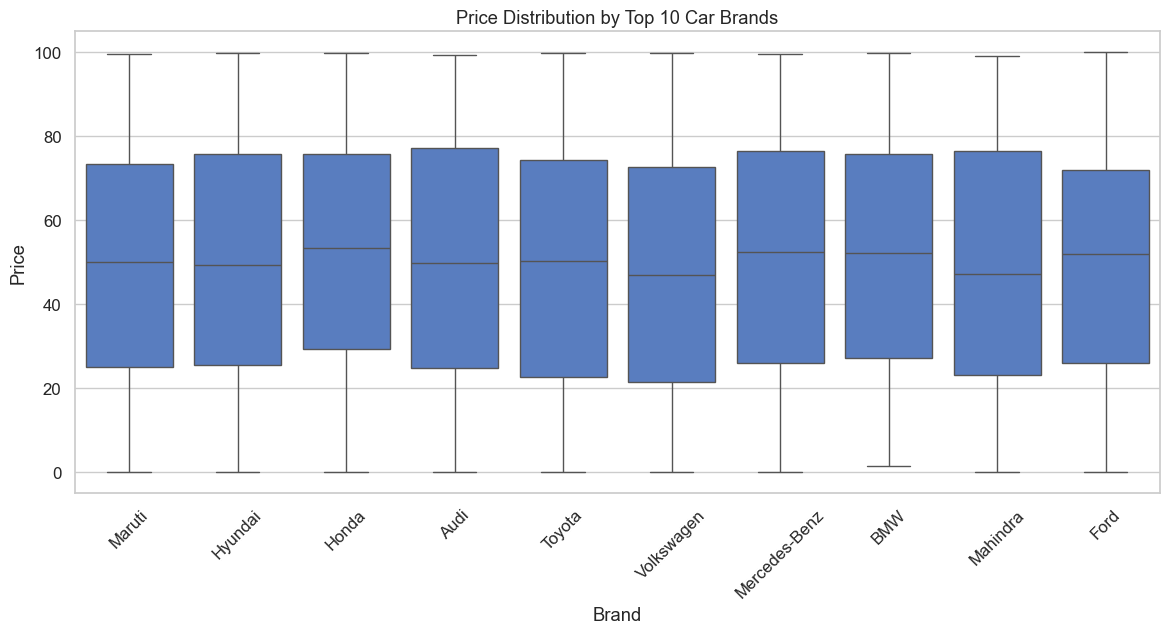

 Grouped 10 rare brands into 'Other'. New brand count: 22


In [6]:
# Extract brand (first word from Name column)
df['Brand'] = df['Name'].str.split().str[0]

# Top brands
brand_counts = df['Brand'].value_counts()
print("üè∑ Top 10 Brands by Count:")
display(brand_counts.head(10))

# Price by brand
plt.figure(figsize=(14, 6))
top_brands = brand_counts.head(10).index
sns.boxplot(data=df[df['Brand'].isin(top_brands)], x='Brand', y=TARGET_COL)
plt.xticks(rotation=45)
plt.title("Price Distribution by Top 10 Car Brands")
plt.show()

# Group rare brands into 'Other'
rare_brands = brand_counts[brand_counts < 20].index
df['Brand'] = df['Brand'].replace(rare_brands, 'Other')

print(f" Grouped {len(rare_brands)} rare brands into 'Other'. New brand count: {df['Brand'].nunique()}")


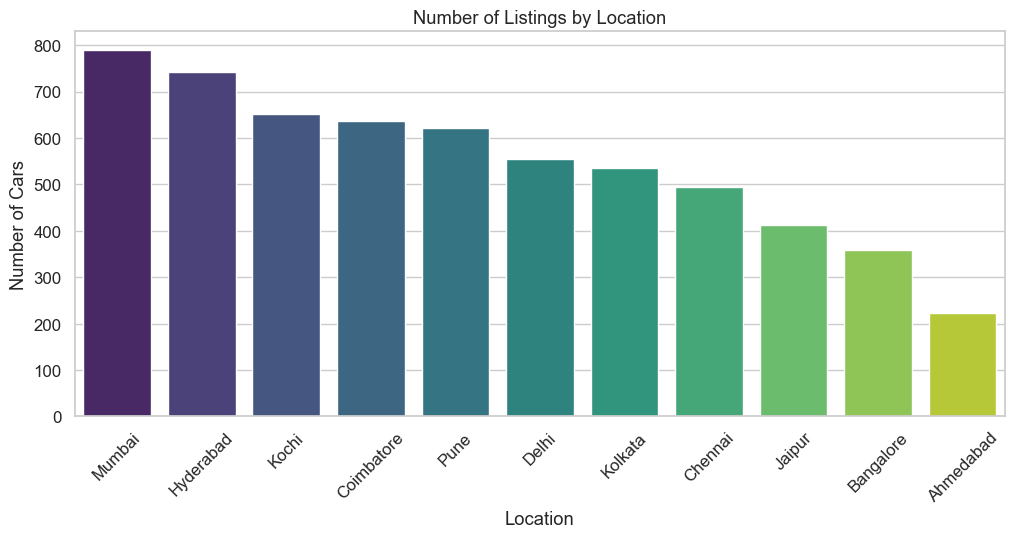

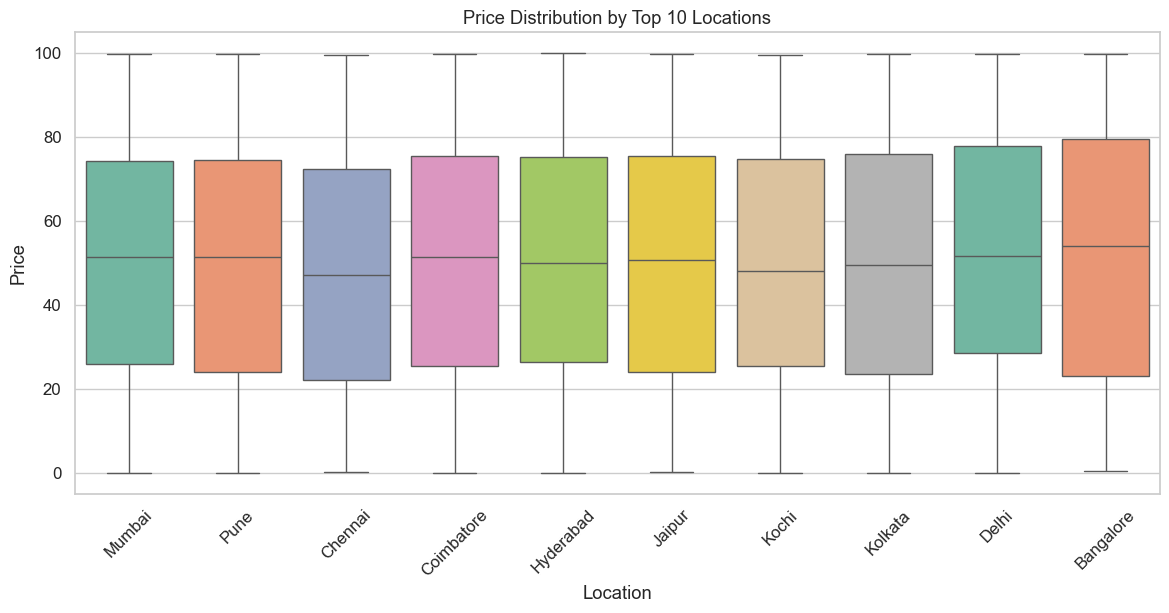

 Price Summary by Location:


mean  median  count
Location                            
Bangalore   52.489358  54.065    358
Delhi       52.339332  51.805    554
Mumbai      50.921063  51.530    790
Coimbatore  50.409528  51.405    636
Hyderabad   50.232695  49.980    742
Jaipur      49.925012  50.790    413
Kolkata     49.891215  49.640    535
Pune        49.873650  51.455    622
Ahmedabad   49.704732  51.020    224
Kochi       49.335914  48.170    651
Chennai     47.966599  47.275    494

In [7]:
# Distribution of car listings by location
location_counts = df['Location'].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Number of Cars")
plt.title("Number of Listings by Location")
plt.show()

# Price distribution by location (only top locations for readability)
top_locations = location_counts.head(10).index

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[df['Location'].isin(top_locations)], x='Location', y=TARGET_COL, palette="Set2")
plt.xticks(rotation=45)
plt.title("Price Distribution by Top 10 Locations")
plt.show()

# Summary statistics by location
location_price_stats = df.groupby('Location')[TARGET_COL].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
print(" Price Summary by Location:")
display(location_price_stats)


 Kilometers Driven Summary:


count    6.019000e+03
mean     5.873838e+04
std      9.126884e+04
min      1.710000e+02
25%      3.400000e+04
50%      5.300000e+04
75%      7.300000e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64

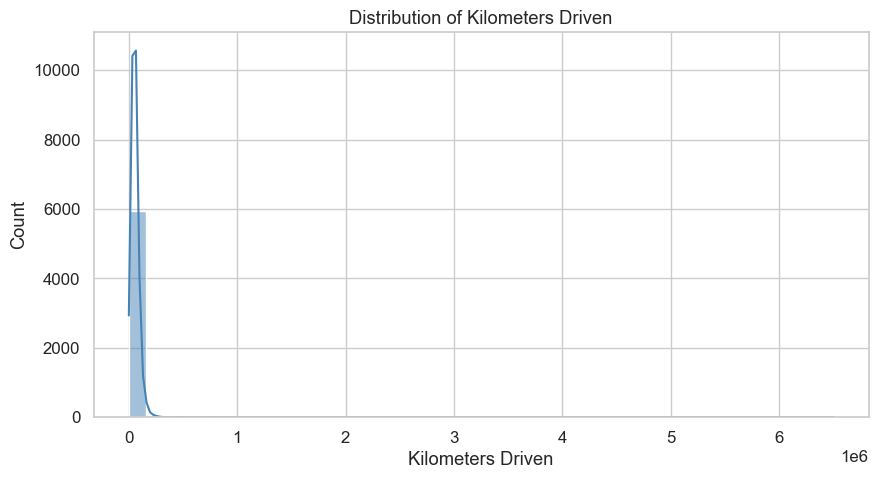

 Cars with kilometers above 99th percentile (172,829 km): 61 rows


Name  Kilometers_Driven  Price
29        Toyota Innova 2.5 V Diesel 7-seater             262000  82.16
64                         Tata Indica V2 eLS             178000  72.45
77                       Toyota Innova 2.0 G1             230000  20.77
181  Ford Fiesta 1.4 TDCi EXI Limited Edition             216000  18.14
230                   Tata Indica V2 DLS BSII             200000  34.83

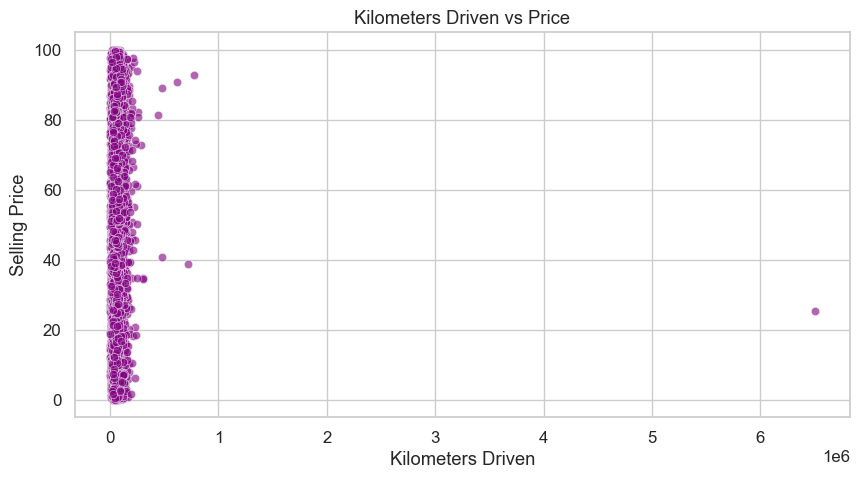

In [8]:
# Basic stats
print(" Kilometers Driven Summary:")
display(df['Kilometers_Driven'].describe())

# Distribution plot
plt.figure(figsize=(10, 5))
sns.histplot(df['Kilometers_Driven'], bins=40, kde=True, color='steelblue')
plt.title("Distribution of Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Count")
plt.show()

# Detect extreme outliers (above 99th percentile)
km_threshold = df['Kilometers_Driven'].quantile(0.99)
extreme_km = df[df['Kilometers_Driven'] > km_threshold]

print(f" Cars with kilometers above 99th percentile ({km_threshold:,.0f} km): {len(extreme_km)} rows")
display(extreme_km[[ 'Name', 'Kilometers_Driven', TARGET_COL ]].head())

# Scatterplot: Kilometers Driven vs Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Kilometers_Driven', y=TARGET_COL, data=df, alpha=0.6, color='purple')
plt.title("Kilometers Driven vs Price")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.show()


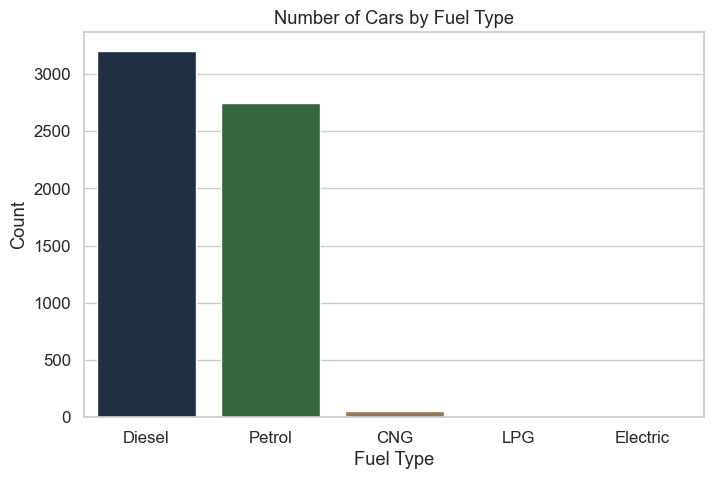

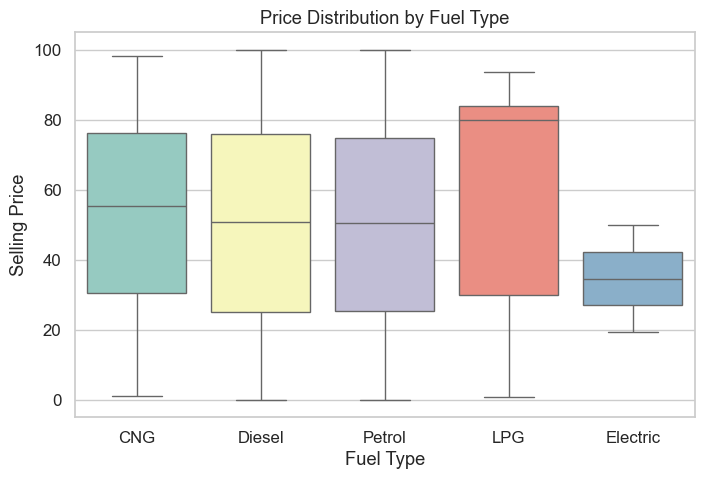

 Price Summary by Fuel Type:


mean  median  count
Fuel_Type                          
LPG        58.655000  79.980     10
CNG        52.463393  55.290     56
Diesel     50.337791  50.700   3205
Petrol     50.145991  50.380   2746
Electric   34.605000  34.605      2

In [9]:
#  Fuel Type Analysis

# Distribution of fuel types
fuel_counts = df['Fuel_Type'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette="cubehelix")
plt.title("Number of Cars by Fuel Type")
plt.ylabel("Count")
plt.xlabel("Fuel Type")
plt.show()

# Price variation by fuel type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fuel_Type', y=TARGET_COL, data=df, palette="Set3")
plt.title("Price Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.show()

# Summary statistics by fuel type
fuel_price_stats = df.groupby('Fuel_Type')[TARGET_COL].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
print(" Price Summary by Fuel Type:")
display(fuel_price_stats)


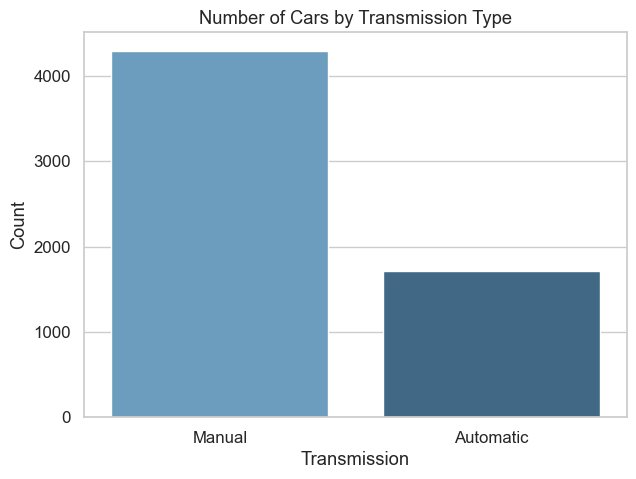

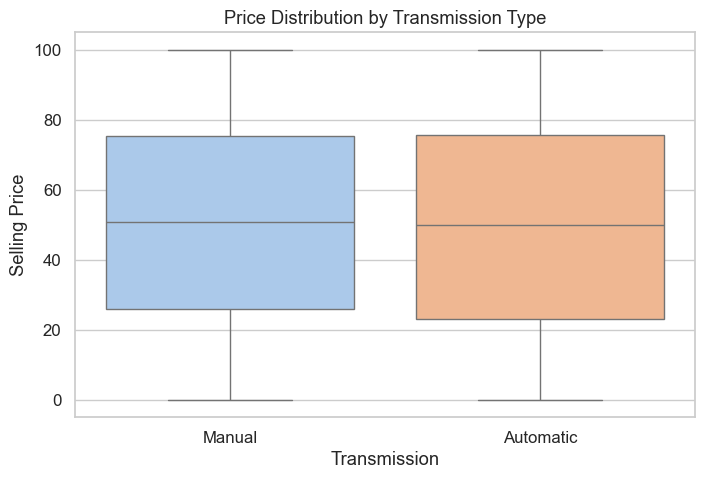

 Price Summary by Transmission Type:


mean  median  count
Transmission                          
Manual        50.596074  50.920   4299
Automatic     49.485291  49.785   1720

In [10]:
# Distribution of transmission types
trans_counts = df['Transmission'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(x=trans_counts.index, y=trans_counts.values, palette="Blues_d")
plt.title("Number of Cars by Transmission Type")
plt.ylabel("Count")
plt.xlabel("Transmission")
plt.show()

# Price distribution by transmission
plt.figure(figsize=(8, 5))
sns.boxplot(x='Transmission', y=TARGET_COL, data=df, palette="pastel")
plt.title("Price Distribution by Transmission Type")
plt.xlabel("Transmission")
plt.ylabel("Selling Price")
plt.show()

# Summary statistics
trans_price_stats = df.groupby('Transmission')[TARGET_COL].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
print(" Price Summary by Transmission Type:")
display(trans_price_stats)


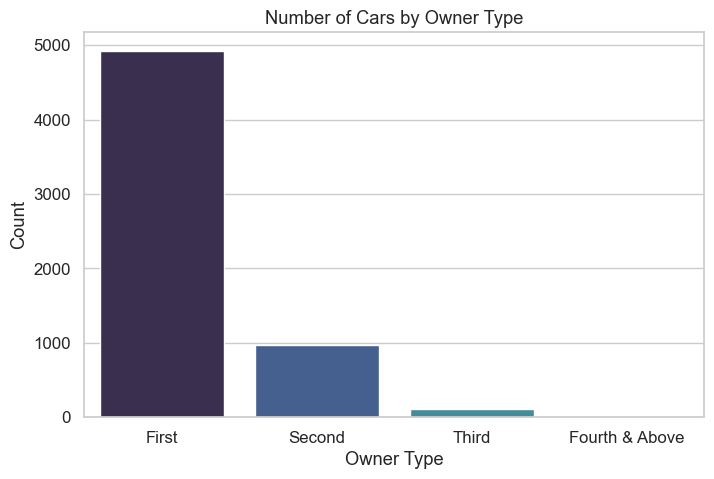

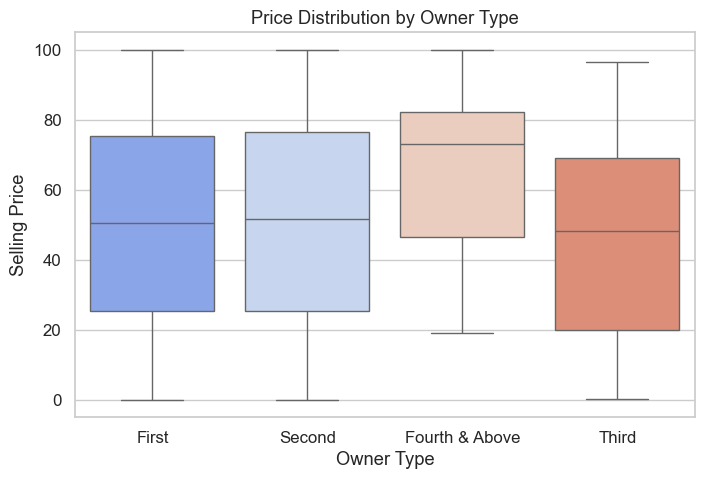

 Price Summary by Owner Type:


mean  median  count
Owner_Type                              
Fourth & Above  62.993333   72.93      9
Second          51.150207   51.71    968
First           50.174421   50.49   4929
Third           46.346549   48.11    113

In [11]:
#  Owner Type Analysis

# Distribution of owner types
owner_counts = df['Owner_Type'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=owner_counts.index, y=owner_counts.values, palette="mako")
plt.title("Number of Cars by Owner Type")
plt.ylabel("Count")
plt.xlabel("Owner Type")
plt.show()

# Price distribution by owner type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Owner_Type', y=TARGET_COL, data=df, palette="coolwarm")
plt.title("Price Distribution by Owner Type")
plt.xlabel("Owner Type")
plt.ylabel("Selling Price")
plt.show()

# Summary statistics
owner_price_stats = df.groupby('Owner_Type')[TARGET_COL].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
print(" Price Summary by Owner Type:")
display(owner_price_stats)


 Missing after cleaning:
Mileage_num      2
Engine_num      36
Power_num      143
dtype: int64


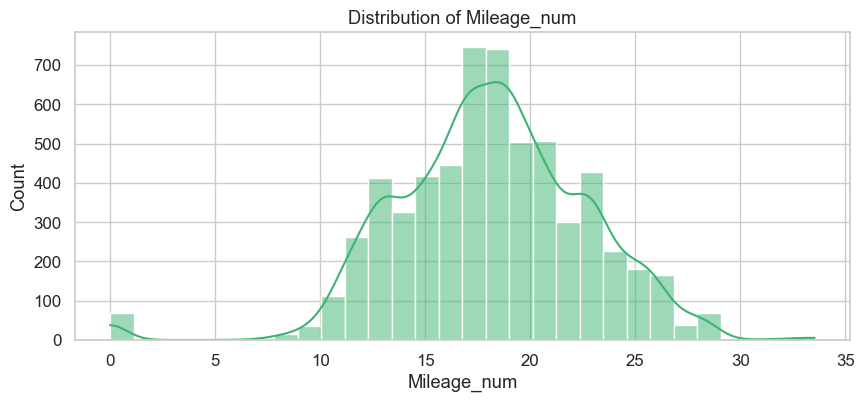

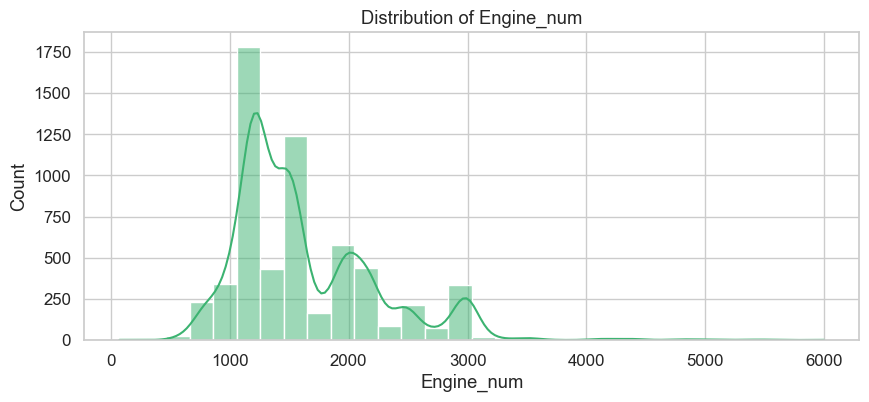

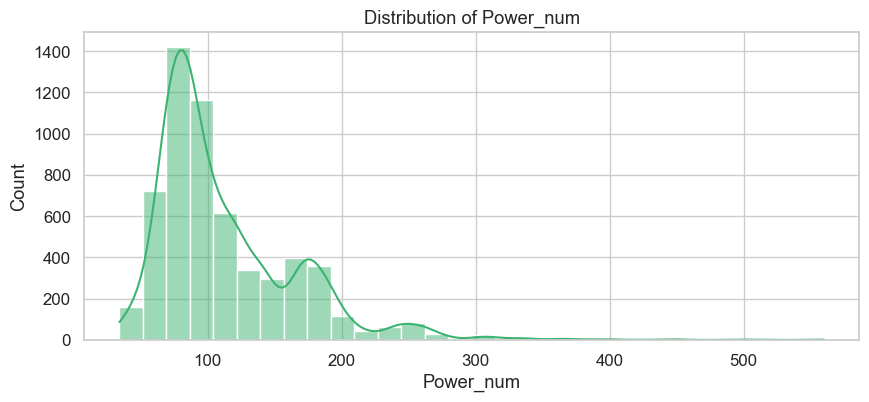

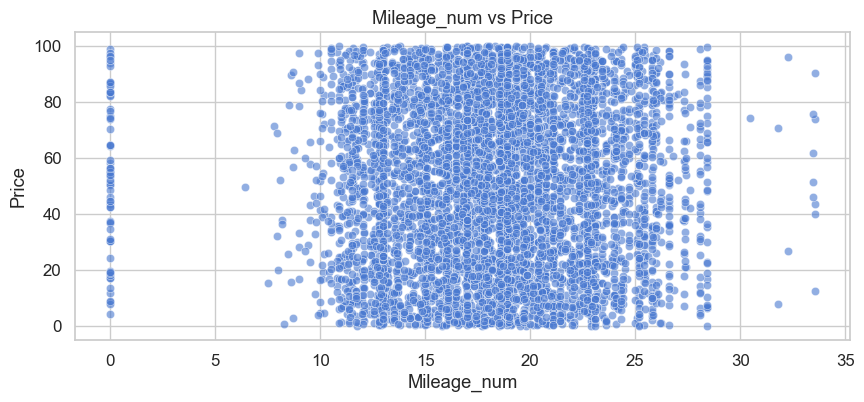

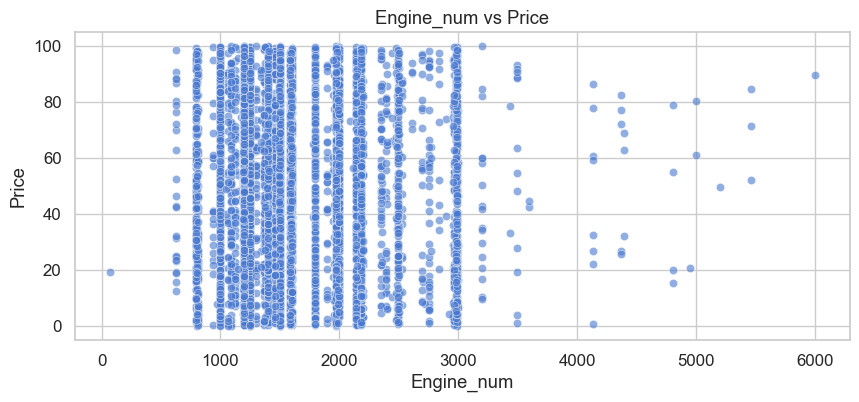

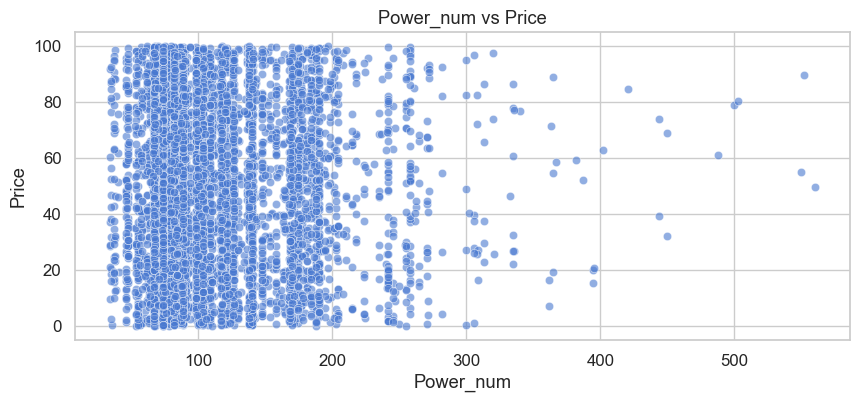

 Summary stats after cleaning:


count         mean         std   min      25%      50%     75%  \
Mileage_num  6017.0    18.134961    4.582289   0.0    15.17    18.15    21.1   
Engine_num   5983.0  1621.276450  601.355233  72.0  1198.00  1493.00  1984.0   
Power_num    5876.0   113.253050   53.874957  34.2    75.00    97.70   138.1   

                 max  
Mileage_num    33.54  
Engine_num   5998.00  
Power_num     560.00

In [12]:
# Helper function to extract numeric value
def extract_numeric(series):
    return pd.to_numeric(series.astype(str).str.extract(r'(\d+\.?\d*)')[0], errors='coerce')

# Clean columns
df['Mileage_num'] = extract_numeric(df['Mileage'])  # kmpl or km/kg
df['Engine_num'] = extract_numeric(df['Engine'])    # CC
df['Power_num']   = extract_numeric(df['Power'])    # bhp

# Show missing counts after conversion
print(" Missing after cleaning:")
print(df[['Mileage_num', 'Engine_num', 'Power_num']].isnull().sum())

# Distribution plots
num_features = ['Mileage_num', 'Engine_num', 'Power_num']
for col in num_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=30, color="mediumseagreen")
    plt.title(f"Distribution of {col}")
    plt.show()

# Scatterplots vs Price
for col in num_features:
    plt.figure(figsize=(10, 4))
    sns.scatterplot(x=col, y=TARGET_COL, data=df, alpha=0.6)
    plt.title(f"{col} vs Price")
    plt.show()

# Summary statistics
print(" Summary stats after cleaning:")
display(df[num_features].describe().T)


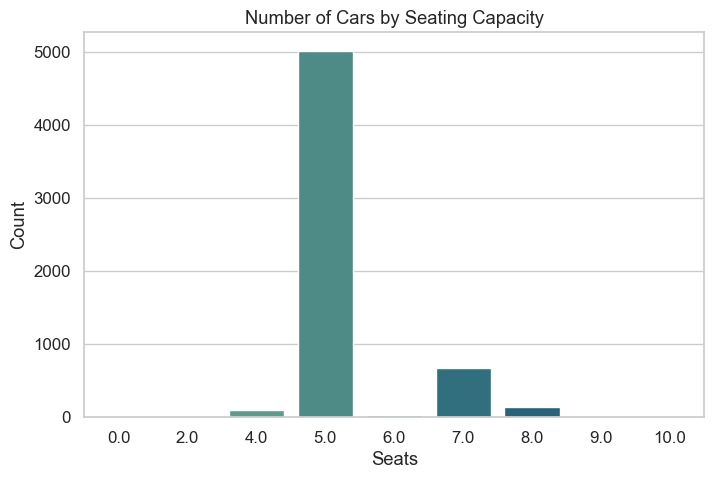

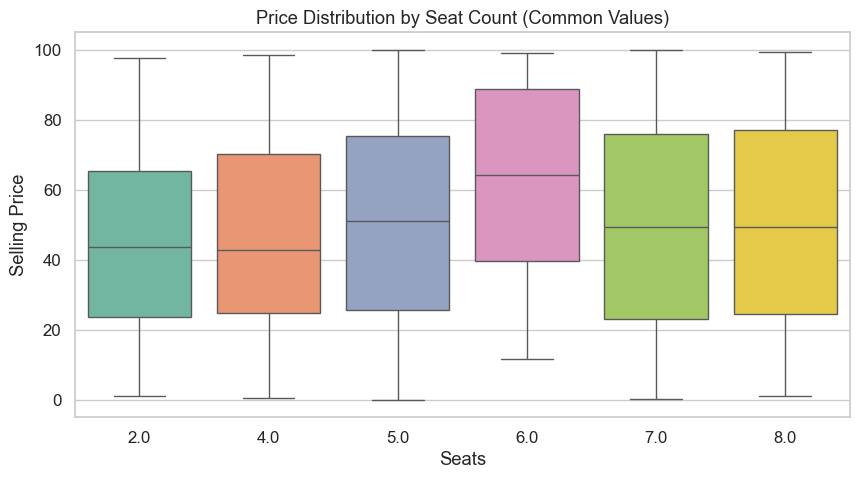

 Price Summary by Seat Count:


mean  median  count
Seats                          
6.0    60.654194  64.340     31
9.0    59.480000  49.250      3
0.0    58.030000  58.030      1
10.0   57.198000  65.990      5
5.0    50.464533  51.085   5014
8.0    50.288955  49.490    134
7.0    49.019036  49.285    674
4.0    48.030404  42.740     99
2.0    45.858125  43.685     16

In [13]:
# Check distribution of seats
seat_counts = df['Seats'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=seat_counts.index, y=seat_counts.values, palette="crest")
plt.title("Number of Cars by Seating Capacity")
plt.xlabel("Seats")
plt.ylabel("Count")
plt.show()

# Price distribution by seats (filter out extreme rare values)
plt.figure(figsize=(10, 5))
common_seats = df['Seats'].value_counts()[df['Seats'].value_counts() > 5].index
sns.boxplot(x='Seats', y=TARGET_COL, data=df[df['Seats'].isin(common_seats)], palette="Set2")
plt.title("Price Distribution by Seat Count (Common Values)")
plt.xlabel("Seats")
plt.ylabel("Selling Price")
plt.show()

# Summary statistics by seat count
seat_price_stats = df.groupby('Seats')[TARGET_COL].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
print(" Price Summary by Seat Count:")
display(seat_price_stats)


 Tax Summary Statistics:


count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Tax, dtype: float64

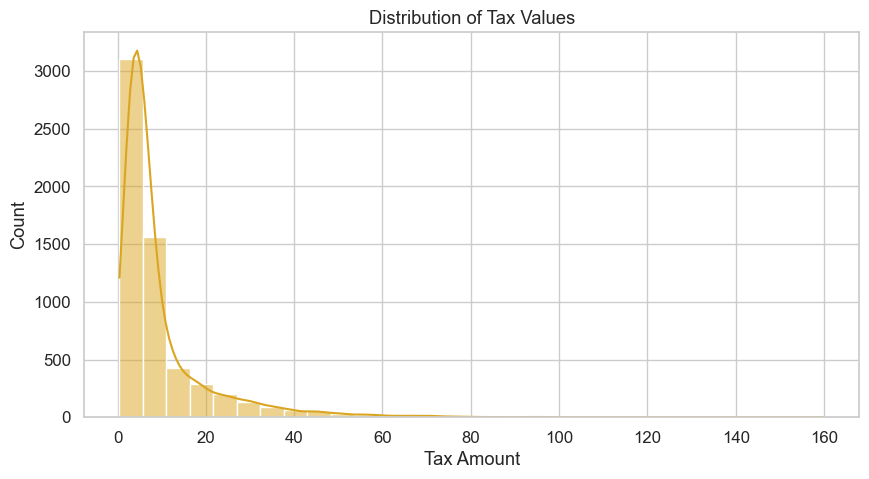

 Cars with Tax above 99th percentile (56): 60 rows


Name    Tax  Price
264                     Mercedes-Benz GLE 350d  61.29  70.88
282         Audi Q7 3.0 TDI Quattro Technology  70.36  54.97
310                     Mercedes-Benz GLE 250d  57.00  61.00
327          Audi Q7 45 TDI Quattro Technology  62.67  15.20
392  Mercedes-Benz S Class 2005 2013 S 350 CDI  62.81  92.66

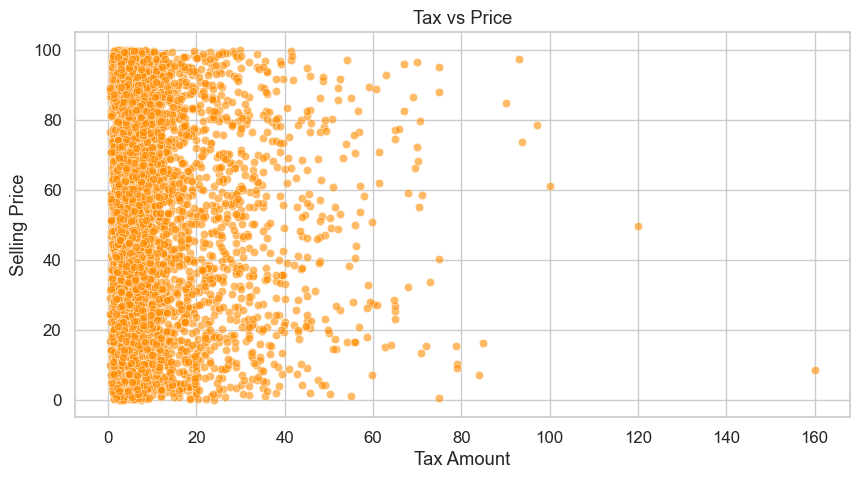

 Price Summary by Tax Bracket:


mean  median  count
Tax                                    
(0.439, 3.1]   50.444963  50.270   1211
(3.1, 4.7]     50.847391  51.450   1211
(4.7, 6.75]    50.478552  51.385   1222
(6.75, 12.5]   50.477475  50.550   1192
(12.5, 160.0]  49.119391  49.730   1183

In [14]:
# Basic summary
print(" Tax Summary Statistics:")
display(df['Tax'].describe())

# Distribution plot
plt.figure(figsize=(10, 5))
sns.histplot(df['Tax'], bins=30, kde=True, color='goldenrod')
plt.title("Distribution of Tax Values")
plt.xlabel("Tax Amount")
plt.ylabel("Count")
plt.show()

# Detect extreme outliers
tax_threshold = df['Tax'].quantile(0.99)
extreme_tax = df[df['Tax'] > tax_threshold]
print(f" Cars with Tax above 99th percentile ({tax_threshold:,.0f}): {len(extreme_tax)} rows")
display(extreme_tax[['Name', 'Tax', TARGET_COL]].head())

# Relationship with price
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Tax', y=TARGET_COL, data=df, alpha=0.6, color='darkorange')
plt.title("Tax vs Price")
plt.xlabel("Tax Amount")
plt.ylabel("Selling Price")
plt.show()

# Summary table by tax bracket
tax_bins = pd.qcut(df['Tax'], q=5, duplicates='drop')
tax_price_stats = df.groupby(tax_bins)[TARGET_COL].agg(['mean', 'median', 'count'])
print(" Price Summary by Tax Bracket:")
display(tax_price_stats)


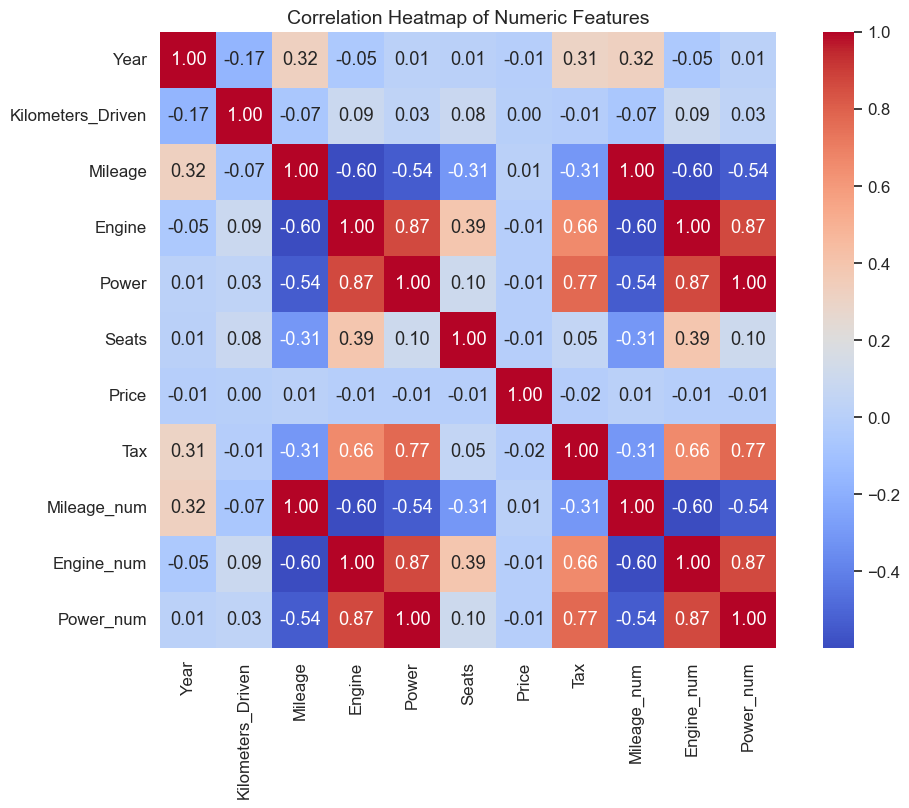

 Top correlations with Price:


Price                1.000000
Mileage              0.013209
Mileage_num          0.013209
Kilometers_Driven    0.001292
Seats               -0.005330
Power_num           -0.007212
Power               -0.007212
Engine_num          -0.008196
Engine              -0.008196
Year                -0.008682
Tax                 -0.016164
Name: Price, dtype: float64

In [15]:
# Selecting numeric columns (after cleaning)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

# Show top correlations with price
price_corr = corr_matrix[TARGET_COL].sort_values(ascending=False)
print(" Top correlations with Price:")
display(price_corr)


 Top correlated features with price: ['Mileage', 'Mileage_num', 'Kilometers_Driven', 'Seats', 'Power_num']


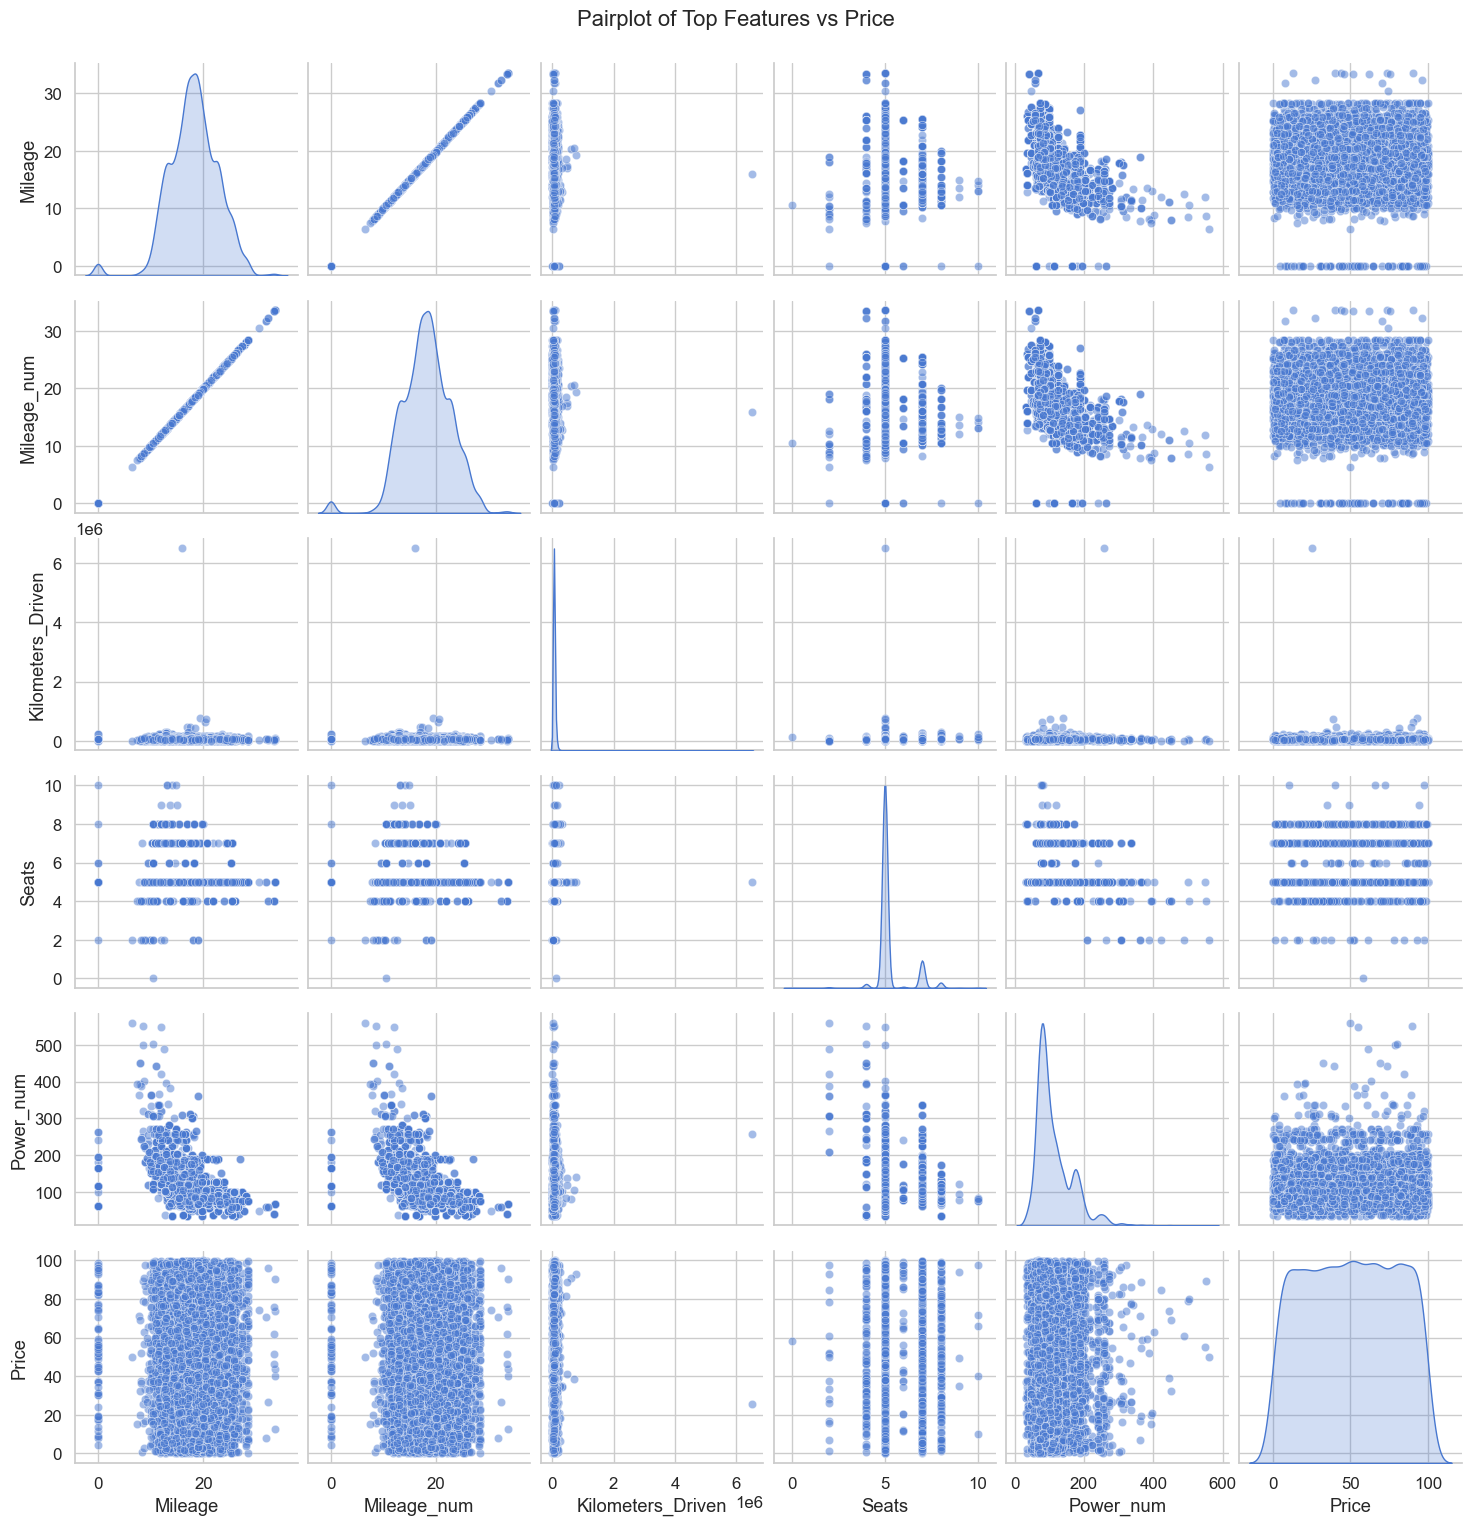

In [16]:
# Select top features correlated with price (excluding price itself)
top_features = price_corr.drop(TARGET_COL).head(5).index.tolist()

# Add price to the list for pairplot
plot_features = top_features + [TARGET_COL]

print(f" Top correlated features with price: {top_features}")

# Pairplot
sns.pairplot(df[plot_features], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Pairplot of Top Features vs Price", y=1.02)
plt.show()


 Missing Value Summary:


Missing_Count  Missing_%
Power                  143   2.375810
Power_num              143   2.375810
Seats                   42   0.697790
Engine_num              36   0.598106
Engine                  36   0.598106
Mileage                  2   0.033228
Mileage_num              2   0.033228

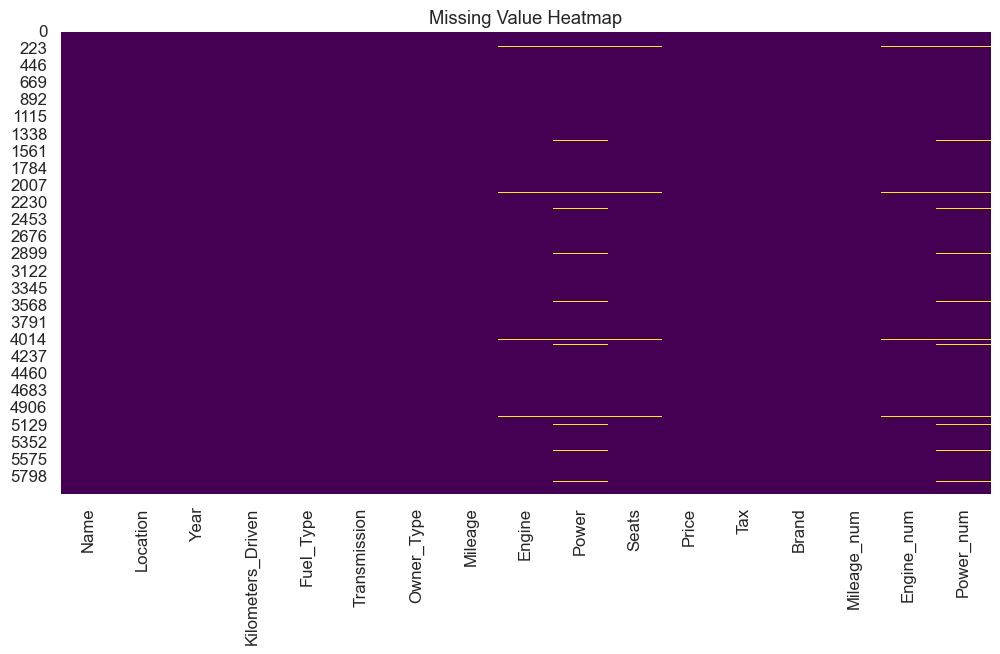

 Missing values handled using median (numeric) and mode (categorical).
 Remaining Missing Count: 0


In [17]:
# Missing value counts & percentages
missing_data = df.isnull().sum().to_frame(name='Missing_Count')
missing_data['Missing_%'] = (missing_data['Missing_Count'] / len(df)) * 100
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(by='Missing_%', ascending=False)

print(" Missing Value Summary:")
display(missing_data)

# Heatmap for missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

# Basic Imputation Strategy
# Numeric columns ‚Üí Median (robust to outliers)
# Categorical columns ‚Üí Mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

print(" Missing values handled using median (numeric) and mode (categorical).")
print(" Remaining Missing Count:", df.isnull().sum().sum())


In [18]:
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0  98.14   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0  70.73   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   0.95   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0  78.04   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0  77.82   

     Tax    Brand  Mileage_num  Engine_num  Power_num  
0   1.75   Maruti        26.60       998.0      58.16  
1  12.50  Hyundai        19.67      1582.0     126.20  
2   4.50    Honda        18.20      1199.0      88.70  
3   6.00   Maruti        20.77      1248.0      88.76  
4  17.74     Audi        15.20      1968.0     140.80

In [19]:
# Check missing values (sorted by count)
missing_values = df.isnull().sum().sort_values(ascending=False)
print("\n Missing Values:")
display(missing_values[missing_values > 0])

# Check duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\n Duplicate Rows: {duplicate_count}")


 Missing Values:


Series([], dtype: int64)


 Duplicate Rows: 0


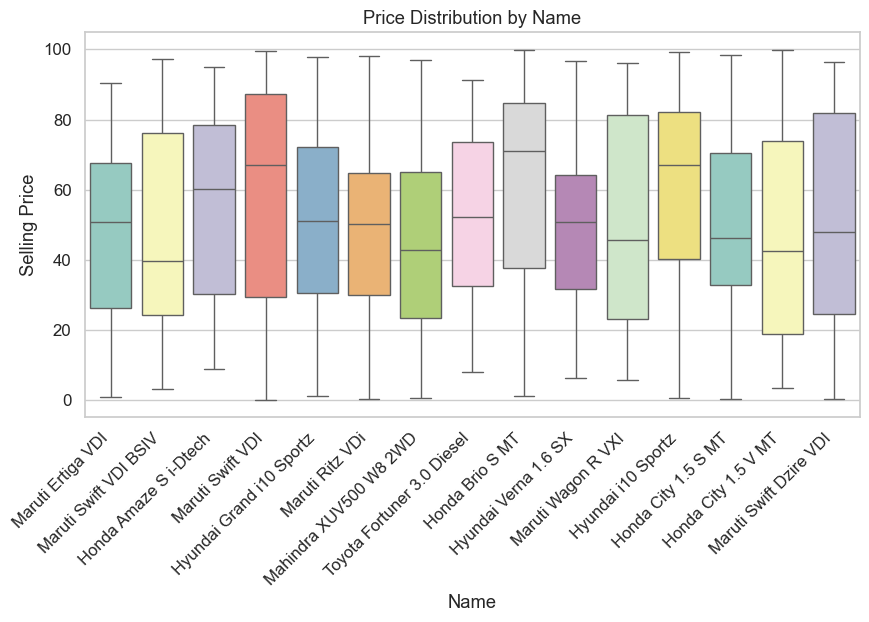

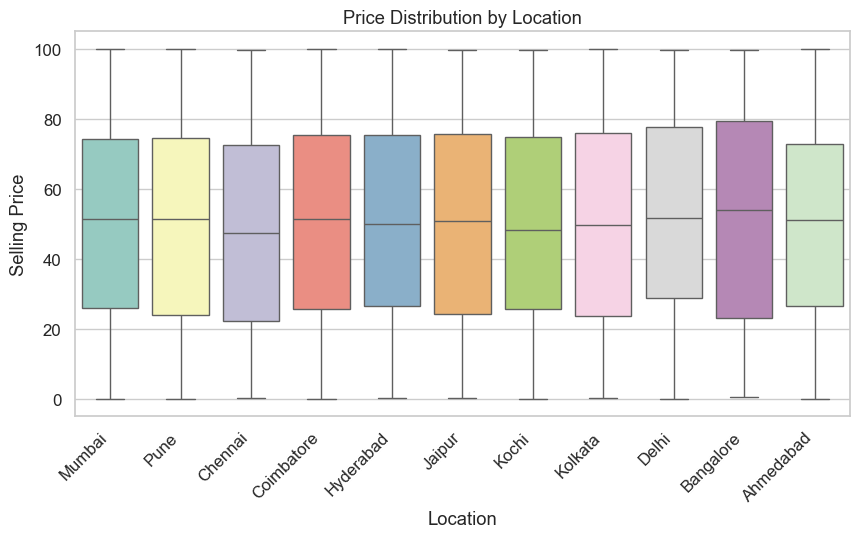

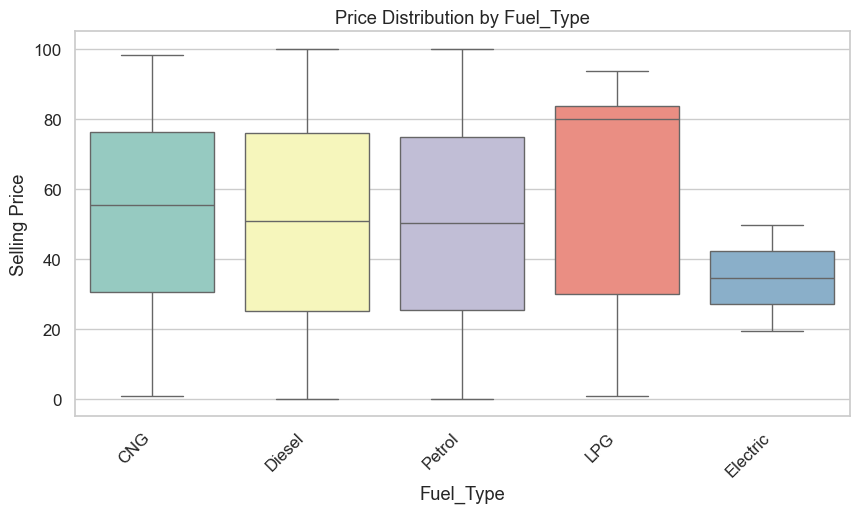

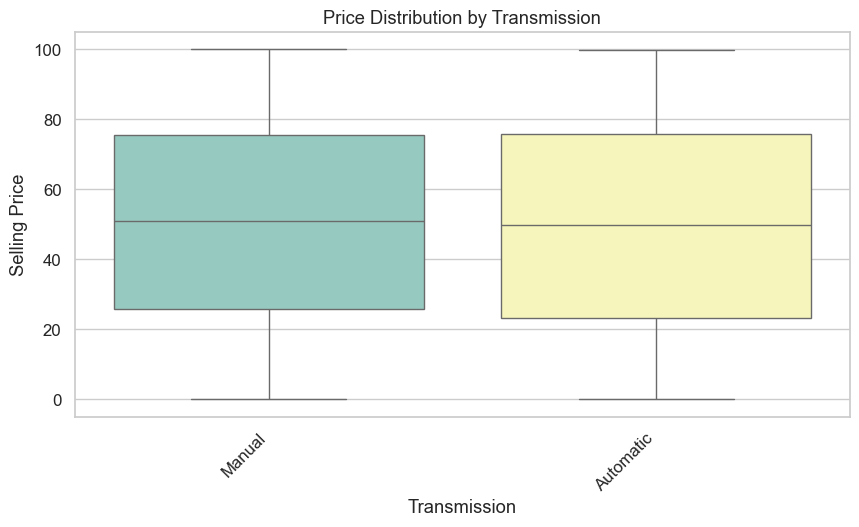

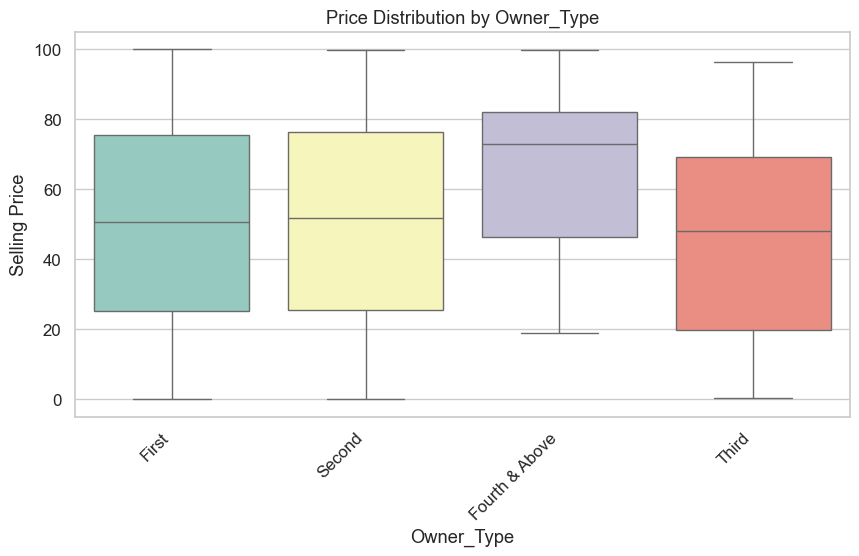

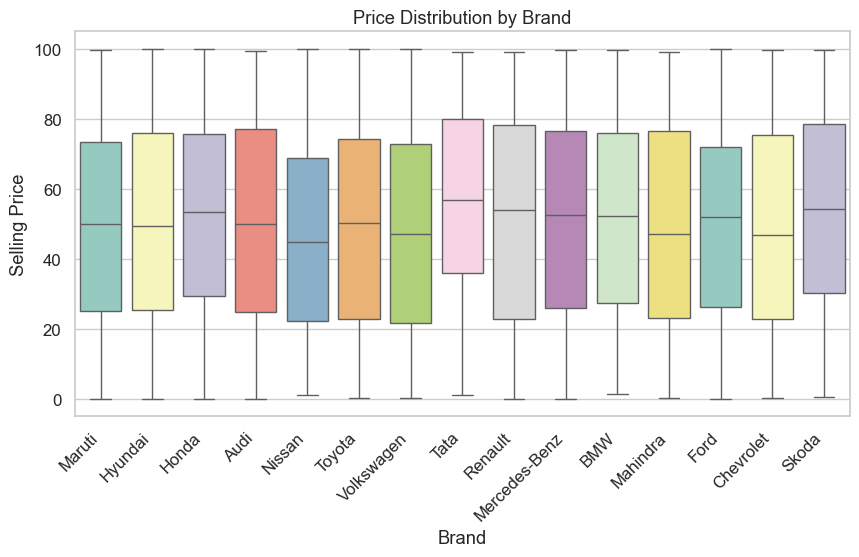

Top Categories by Average Price:

--- Name ---
Name
Nissan Micra XV Primo                       99.910
Honda Brio 1.2 VX AT                        99.590
Tata New Safari DICOR 2.2 EX 4x2            99.260
Chevrolet Beat LT Option                    99.100
Tata Manza Aqua Quadrajet                   99.080
Mahindra Scorpio 2.6 SLX CRDe               99.055
Skoda Rapid Ultima 1.6 MPI Ambition Plus    99.020
Maruti Celerio ZXI Optional                 98.780
Mercedes-Benz S Class 2005 2013 S 300 L     98.660
Tata Manza Aqua Safire                      98.650
Name: Price, dtype: float64

--- Location ---
Location
Bangalore     52.489358
Delhi         52.339332
Mumbai        50.921063
Coimbatore    50.409528
Hyderabad     50.232695
Jaipur        49.925012
Kolkata       49.891215
Pune          49.873650
Ahmedabad     49.704732
Kochi         49.335914
Name: Price, dtype: float64

--- Fuel_Type ---
Fuel_Type
LPG         58.655000
CNG         52.463393
Diesel      50.337791
Petrol      50.14599

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns (excluding the target column)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != TARGET_COL]


#  Categorical Features vs Price Analysis
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    
    # Limit to top categories to avoid overcrowding
    top_categories = df[col].value_counts().index[:15]
    subset = df[df[col].isin(top_categories)]
    
    sns.boxplot(x=col, y=TARGET_COL, data=subset, palette='Set3')
    plt.title(f"Price Distribution by {col}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Selling Price")
    plt.xlabel(col)
    plt.show()

# Summary: Average price by category
cat_price_summary = {}
for col in categorical_cols:
    avg_prices = df.groupby(col)[TARGET_COL].mean().sort_values(ascending=False)
    cat_price_summary[col] = avg_prices.head(10)  # top 10 for brevity

print("Top Categories by Average Price:")
for col, series in cat_price_summary.items():
    print(f"\n--- {col} ---")
    print(series)


In [21]:
encoding_plan = []

for col in categorical_cols:
    unique_count = df[col].nunique()
    
    if unique_count == 2:
        strategy = "Binary Encoding (0/1)"
    elif unique_count <= 10:
        strategy = "One-Hot Encoding"
    elif unique_count <= 50:
        strategy = "One-Hot (if important) or Target Encoding"
    else:
        strategy = "High Cardinality ‚Üí Target Encoding or Frequency Encoding"
    
    encoding_plan.append({
        'Feature': col,
        'Unique_Count': unique_count,
        'Proposed_Strategy': strategy
    })

encoding_df = pd.DataFrame(encoding_plan).sort_values(by='Unique_Count', ascending=False)
display(encoding_df)

print(" Encoding Strategy Notes:")
print("- Low-cardinality features (<10 unique values): One-Hot Encoding is safe.")
print("- Binary features: Simple 0/1 mapping.")
print("- Medium-cardinality (10‚Äì50): One-Hot if strong correlation; else Target Encoding.")
print("- High-cardinality (>50, e.g., 'Name'): Use Target Encoding or Frequency Encoding to avoid high-dimensionality.")
print("- After encoding, all categorical features become numeric for modeling.")


Feature  Unique_Count  \
0          Name          1876   
5         Brand            22   
1      Location            11   
2     Fuel_Type             5   
4    Owner_Type             4   
3  Transmission             2   

                                   Proposed_Strategy  
0  High Cardinality ‚Üí Target Encoding or Frequenc...  
5          One-Hot (if important) or Target Encoding  
1          One-Hot (if important) or Target Encoding  
2                                   One-Hot Encoding  
4                                   One-Hot Encoding  
3                              Binary Encoding (0/1)

 Encoding Strategy Notes:
- Low-cardinality features (<10 unique values): One-Hot Encoding is safe.
- Binary features: Simple 0/1 mapping.
- Medium-cardinality (10‚Äì50): One-Hot if strong correlation; else Target Encoding.
- High-cardinality (>50, e.g., 'Name'): Use Target Encoding or Frequency Encoding to avoid high-dimensionality.
- After encoding, all categorical features become numeric for modeling.


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder

# Separate features into groups based on our encoding_df plan
binary_features = encoding_df[encoding_df['Proposed_Strategy'].str.contains("Binary")]['Feature'].tolist()
low_card_features = encoding_df[encoding_df['Proposed_Strategy'].str.contains("One-Hot")]['Feature'].tolist()
high_card_features = encoding_df[encoding_df['Proposed_Strategy'].str.contains("Target")]['Feature'].tolist()

# Numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=[TARGET_COL]).columns.tolist()

# Transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

low_card_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # updated here
high_card_transformer = TargetEncoder()

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('low_card_cat', low_card_transformer, low_card_features),
        ('high_card_cat', high_card_transformer, high_card_features)
    ],
    remainder='drop'
)

# Apply preprocessing to features
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

print(f"Preprocessing Pipeline Created")
print(f"- Numeric Features Scaled: {len(numeric_features)}")
print(f"- Low-Cardinality One-Hot Encoded: {len(low_card_features)}")
print(f"- High-Cardinality Target Encoded: {len(high_card_features)}")


Preprocessing Pipeline Created
- Numeric Features Scaled: 10
- Low-Cardinality One-Hot Encoded: 4
- High-Cardinality Target Encoded: 3


In [23]:
# Train-Test Split & Preprocessing Execution
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f"üîπ Training set: {X_train.shape[0]} rows")
print(f"üîπ Testing set: {X_test.shape[0]} rows")

# Fit the preprocessing pipeline on training data only
preprocessor.fit(X_train, y_train)

# Transform both train and test sets
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f" Preprocessing Complete")
print(f"- Processed training features shape: {X_train_processed.shape}")
print(f"- Processed testing features shape: {X_test_processed.shape}")


üîπ Training set: 4815 rows
üîπ Testing set: 1204 rows
 Preprocessing Complete
- Processed training features shape: (4815, 55)
- Processed testing features shape: (1204, 55)


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize baseline model
baseline_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Train on processed data
baseline_model.fit(X_train_processed, y_train)

# Predictions
y_train_pred = baseline_model.predict(X_train_processed)
y_test_pred = baseline_model.predict(X_test_processed)

# Evaluation
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(" Baseline Model Performance (Random Forest)")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train R¬≤: {train_r2:.3f}")
print(f"Test R¬≤: {test_r2:.3f}")


 Baseline Model Performance (Random Forest)
Train RMSE: 9.69
Test RMSE: 33.42
Train R¬≤: 0.887
Test R¬≤: -0.323


In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001, max_iter=10000),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1)
}

results = []

for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({
        "Model": name,
        "Test RMSE": rmse,
        "Test R¬≤": r2
    })

results_df = pd.DataFrame(results).sort_values(by="Test RMSE", ascending=True)
display(results_df)

print(" The model with the lowest RMSE and highest R¬≤ will be our candidate for hyperparameter tuning.")


Model  Test RMSE   Test R¬≤
2   Lasso Regression  33.216575 -0.306406
1   Ridge Regression  33.220689 -0.306730
0  Linear Regression  33.223149 -0.306924
4  Gradient Boosting  33.357297 -0.317499
3      Random Forest  33.424847 -0.322840
5            XGBoost  34.047158 -0.372557

 The model with the lowest RMSE and highest R¬≤ will be our candidate for hyperparameter tuning.


In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Parameter grid for Lasso
param_dist = {
    'alpha': loguniform(1e-4, 10)  # Regularization strength
}

lasso = Lasso(max_iter=10000, random_state=42)

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=lasso,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_processed, y_train)

# Best parameters & performance
best_lasso = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate on test set
y_test_pred = best_lasso.predict(X_test_processed)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(" Best Lasso Parameters:", best_params)
print(f" Test RMSE: {test_rmse:.2f}")
print(f" Test R¬≤: {test_r2:.3f}")


 Best Lasso Parameters: {'alpha': np.float64(0.8431013932082461)}
 Test RMSE: 32.74
 Test R¬≤: -0.270


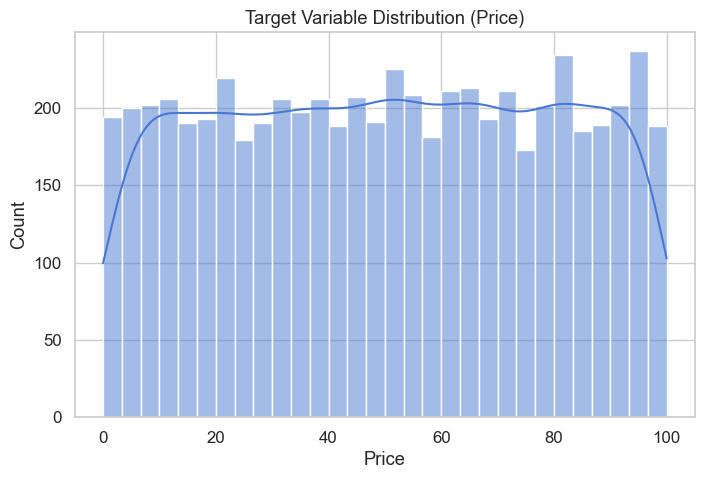

Skewness of target: -0.01

 Numeric Feature Correlations with Price:


Correlation_with_Price
Tax                             -0.016164
Mileage                          0.013207
Mileage_num                      0.013207
Year                            -0.008682
Engine_num                      -0.008122
Engine                          -0.008122
Power_num                       -0.007822
Power                           -0.007822
Seats                           -0.004943
Kilometers_Driven                0.001292


 Mutual Information Scores:


Feature  MI_Score
52               high_card_cat__Name  0.711772
6                           num__Tax  0.014768
0                          num__Year  0.010485
53              high_card_cat__Brand  0.007655
1             num__Kilometers_Driven  0.005807
33  low_card_cat__Location_Bangalore  0.004469
16       low_card_cat__Brand_Hyundai  0.004386
15         low_card_cat__Brand_Honda  0.003756
12     low_card_cat__Brand_Chevrolet  0.003419
14          low_card_cat__Brand_Ford  0.002263
47    low_card_cat__Fuel_Type_Petrol  0.002189
18          low_card_cat__Brand_Land  0.002102
29        low_card_cat__Brand_Toyota  0.002039
39      low_card_cat__Location_Kochi  0.001916
42       low_card_cat__Location_Pune  0.001569
11           low_card_cat__Brand_BMW  0.001434
51    low_card_cat__Owner_Type_Third  0.001240
13          low_card_cat__Brand_Fiat  0.001201
46       low_card_cat__Fuel_Type_LPG  0.001072
25         low_card_cat__Brand_Other  0.001055

In [27]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1Ô∏è Target variable distribution
plt.figure(figsize=(8,5))
sns.histplot(y, bins=30, kde=True)
plt.title("Target Variable Distribution (Price)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

print(f"Skewness of target: {y.skew():.2f}")

# Suggest log-transform if skew > 1
if abs(y.skew()) > 1:
    print("‚ö† Target is highly skewed ‚Äî consider log transformation.")

#  Correlation with numeric features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
correlations = {}
for col in numeric_features:
    try:
        correlations[col] = np.corrcoef(X[col], y)[0, 1]
    except:
        correlations[col] = np.nan

corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation_with_Price'])
corr_df = corr_df.sort_values(by='Correlation_with_Price', key=lambda x: abs(x), ascending=False)

print("\n Numeric Feature Correlations with Price:")
display(corr_df)

# 3Ô∏è Quick predictive power check with Mutual Information
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X_train_processed, y_train, random_state=42)
mi_df = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

print("\n Mutual Information Scores:")
display(mi_df.head(20))


In [28]:
# Make a copy to avoid overwriting original
df_fe = df.copy()

# 1Ô∏è Extract Brand and Model from Name
df_fe['Brand'] = df_fe['Name'].apply(lambda x: x.split()[0])
df_fe['Model'] = df_fe['Name'].apply(lambda x: ' '.join(x.split()[1:3]) if len(x.split()) > 2 else x.split()[1] if len(x.split()) > 1 else None)

# 2Ô∏è Convert Mileage to numeric (remove 'kmpl' or 'km/kg')
df_fe['Mileage'] = (
    df_fe['Mileage']
    .astype(str)
    .str.extract(r'(\d+\.?\d*)')[0]
    .astype(float)
)

# 3Ô∏è Convert Engine to numeric (remove 'CC')
df_fe['Engine'] = (
    df_fe['Engine']
    .astype(str)
    .str.extract(r'(\d+\.?\d*)')[0]
    .astype(float)
)

# 4Ô∏è Convert Power to numeric (remove 'bhp')
df_fe['Power'] = (
    df_fe['Power']
    .astype(str)
    .str.extract(r'(\d+\.?\d*)')[0]
    .astype(float)
)

# 5Ô∏è Clean Seats column (ensure numeric)
df_fe['Seats'] = pd.to_numeric(df_fe['Seats'], errors='coerce')

# 6Ô∏è Drop original Name to avoid leakage
df_fe.drop(columns=['Name'], inplace=True)

# 7Ô∏è Quick check
print(" Sample after feature engineering:")
display(df_fe.head())

print("\nMissing values after conversion:")
print(df_fe.isnull().sum())


 Sample after feature engineering:


Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Mileage  Engine   Power  Seats  Price    Tax    Brand  Mileage_num  \
0    26.60   998.0   58.16    5.0  98.14   1.75   Maruti        26.60   
1    19.67  1582.0  126.20    5.0  70.73  12.50  Hyundai        19.67   
2    18.20  1199.0   88.70    5.0   0.95   4.50    Honda        18.20   
3    20.77  1248.0   88.76    7.0  78.04   6.00   Maruti        20.77   
4    15.20  1968.0  140.80    5.0  77.82  17.74     Audi        15.20   

   Engine_num  Power_num       Model  
0       998.0      58.16     Wagon R  
1      1582.0     126.20   Creta 1.6  
2      1199.0      88.70      Jazz V  
3      1248.0      88.76  Ertiga VDI  
4      1968.0     140.80      A4 New


Missing values after conversion:
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Tax                  0
Brand                0
Mileage_num          0
Engine_num           0
Power_num            0
Model                0
dtype: int64


In [29]:
from sklearn.feature_selection import mutual_info_regression

# Make sure target is numeric
y = df_fe['Price']
X = df_fe.drop(columns=['Price'])

# One-hot encode categorical features for MI calculation
X_encoded = pd.get_dummies(X, drop_first=True)

# Calculate MI scores
mi_scores = mutual_info_regression(X_encoded, y, discrete_features='auto', random_state=42)

# Create DataFrame of MI scores
mi_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

print(" Top 20 features by Mutual Information Score:")
display(mi_df.head(20))


 Top 20 features by Mutual Information Score:


Feature  MI_Score
6                    Tax  0.009939
0                   Year  0.008104
36           Brand_Honda  0.006549
8             Engine_num  0.004769
3                 Engine  0.004679
18       Location_Mumbai  0.003374
10    Location_Bangalore  0.003161
352      Model_Grand i10  0.002584
325   Model_Fortuner 2.8  0.002541
44        Brand_Mahindra  0.002447
24   Transmission_Manual  0.002264
259   Model_Ecosport 1.5  0.002169
731        Model_i10 Era  0.002139
670  Model_Vitara Brezza  0.002032
373     Model_Innova 2.5  0.001953
14    Location_Hyderabad  0.001828
22         Fuel_Type_LPG  0.001694
130        Model_Beat LT  0.001670
656   Model_Vento Petrol  0.001650
496         Model_Q7 3.0  0.001650

In [30]:
# Feature Interaction Engineering

df_int = df_fe.copy()

# Price per Engine CC
df_int['Price_per_CC'] = df_int['Price'] / df_int['Engine_num']

# Price per BHP
df_int['Price_per_BHP'] = df_int['Price'] / df_int['Power_num']

# Power-to-Weight proxy (Power / Engine)
df_int['BHP_per_CC'] = df_int['Power_num'] / df_int['Engine_num']

# Age of car
current_year = 2025
df_int['Car_Age'] = current_year - df_int['Year']

# Mileage √ó Engine size (efficiency-power interaction)
df_int['Mileage_CC'] = df_int['Mileage_num'] * df_int['Engine_num']

# Drop any inf or NaN from weird divisions
df_int.replace([np.inf, -np.inf], np.nan, inplace=True)
df_int.dropna(inplace=True)

# Quick check
print(" Created interaction features. New shape:", df_int.shape)
display(df_int.head())


 Created interaction features. New shape: (6019, 22)


Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Mileage  Engine   Power  Seats  ...    Brand  Mileage_num Engine_num  \
0    26.60   998.0   58.16    5.0  ...   Maruti        26.60      998.0   
1    19.67  1582.0  126.20    5.0  ...  Hyundai        19.67     1582.0   
2    18.20  1199.0   88.70    5.0  ...    Honda        18.20     1199.0   
3    20.77  1248.0   88.76    7.0  ...   Maruti        20.77     1248.0   
4    15.20  1968.0  140.80    5.0  ...     Audi        15.20     1968.0   

   Power_num       Model  Price_per_CC Price_per_BHP  BHP_per_CC  Car_Age  \
0      58.16     Wagon R      0.098337      1.687414    0.058277       15   
1     126.20   Creta 1.6      0.044709      0.560460    0.079772       10   
2      88.70      Jazz V      0.000792      0.010710    0.073978       14   
3      88.76  Ertiga VDI      0.062532      0.879225    0.071122       13   
4     140.80      A4 New      0.039543      0.552699    0.071545       12   

   Mileage_CC  
0    26546.80  
1    31117.94  
2    21821.80  
3    25920.96  
4    29913.60  

[5 rows x 22 columns]

In [31]:
#  Mutual Information after Feature Engineering
from sklearn.feature_selection import mutual_info_regression

# Make sure target is numeric
y = df_fe['Price']
X = df_fe.drop(columns=['Price'])

# One-hot encode categorical features for MI calculation
X_encoded = pd.get_dummies(X, drop_first=True)

# Calculate MI scores
mi_scores = mutual_info_regression(X_encoded, y, discrete_features='auto', random_state=42)

# Create DataFrame of MI scores
mi_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

print(" Top 20 features by Mutual Information Score:")
display(mi_df.head(20))


 Top 20 features by Mutual Information Score:


Feature  MI_Score
6                    Tax  0.009939
0                   Year  0.008104
36           Brand_Honda  0.006549
8             Engine_num  0.004769
3                 Engine  0.004679
18       Location_Mumbai  0.003374
10    Location_Bangalore  0.003161
352      Model_Grand i10  0.002584
325   Model_Fortuner 2.8  0.002541
44        Brand_Mahindra  0.002447
24   Transmission_Manual  0.002264
259   Model_Ecosport 1.5  0.002169
731        Model_i10 Era  0.002139
670  Model_Vitara Brezza  0.002032
373     Model_Innova 2.5  0.001953
14    Location_Hyderabad  0.001828
22         Fuel_Type_LPG  0.001694
130        Model_Beat LT  0.001670
656   Model_Vento Petrol  0.001650
496         Model_Q7 3.0  0.001650

In [32]:
#  Mutual Information after Interaction Feature Engineering
from sklearn.feature_selection import mutual_info_regression

y = df_int['Price']
X = df_int.drop(columns=['Price'])

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Calculate MI scores
mi_scores_int = mutual_info_regression(X_encoded, y, discrete_features='auto', random_state=42)

# Create DataFrame of MI scores
mi_df_int = pd.DataFrame({
    'Feature': X_encoded.columns,
    'MI_Score': mi_scores_int
}).sort_values(by='MI_Score', ascending=False)

print(" Top 20 features by Mutual Information Score (After Interactions):")
display(mi_df_int.head(20))


 Top 20 features by Mutual Information Score (After Interactions):


Feature  MI_Score
10         Price_per_CC  2.249064
11        Price_per_BHP  1.220365
14           Mileage_CC  0.021392
6                   Tax  0.009528
12           BHP_per_CC  0.008277
0                  Year  0.007757
13              Car_Age  0.007468
41          Brand_Honda  0.005467
3                Engine  0.004741
8            Engine_num  0.004109
15   Location_Bangalore  0.004025
357     Model_Grand i10  0.003555
264  Model_Ecosport 1.5  0.003155
23      Location_Mumbai  0.003014
42        Brand_Hyundai  0.002759
135       Model_Beat LT  0.002057
22     Location_Kolkata  0.002055
330  Model_Fortuner 2.8  0.001888
210   Model_Compass 2.0  0.001839
340     Model_GLA Class  0.001832

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import pandas as pd
import numpy as np

# Define X and y
X = df_int.drop(columns=['Price'])
y = df_int['Price']

# One-hot encode categoricals
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# Evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # RMSE calculation compatible with all sklearn versions
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append((name, rmse, r2))

# Results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Test RMSE", "Test R¬≤"])\
                .sort_values(by="Test RMSE")

display(results_df)
print(" The top performer will be tuned in the next step.")


Model  Test RMSE   Test R¬≤
3      Random Forest   0.998993  0.998818
5            XGBoost   1.218497  0.998242
4  Gradient Boosting   1.969409  0.995408
0  Linear Regression  10.168518  0.877571
1   Ridge Regression  11.623539  0.840027
2   Lasso Regression  13.480734  0.784823

 The top performer will be tuned in the next step.


In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV for efficiency
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_root_mean_squared_error',  # RMSE as scoring
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", rf_search.best_params_)
print("Best CV RMSE:", -rf_search.best_score_)

# Evaluate on test set
best_rf = rf_search.best_estimator_
y_pred = best_rf.predict(X_test)

# RMSE calculation compatible with all sklearn versions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test R¬≤: {r2:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50}
Best CV RMSE: 8.681094716349516
Test RMSE: 7.8598
Test R¬≤: 0.9269


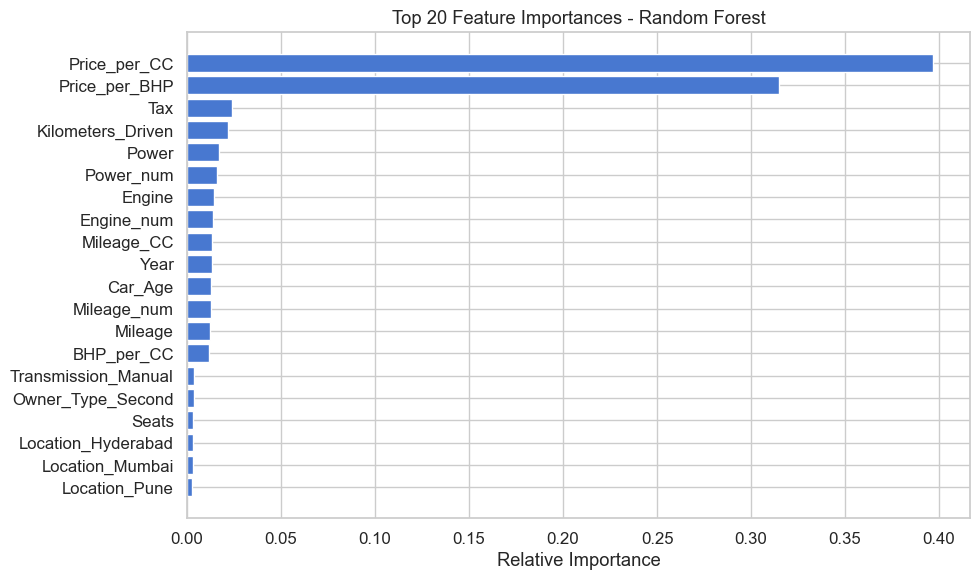

Feature  Importance
0          Price_per_CC    0.396880
1         Price_per_BHP    0.314668
2                   Tax    0.023798
3     Kilometers_Driven    0.021568
4                 Power    0.016989
5             Power_num    0.016015
6                Engine    0.014166
7            Engine_num    0.014001
8            Mileage_CC    0.013418
9                  Year    0.013052
10              Car_Age    0.012971
11          Mileage_num    0.012790
12              Mileage    0.012025
13           BHP_per_CC    0.011415
14  Transmission_Manual    0.003716
15    Owner_Type_Second    0.003444
16                Seats    0.003082
17   Location_Hyderabad    0.003019
18      Location_Mumbai    0.002974
19        Location_Pune    0.002688

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

# Display top 20
top_n = 20
plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances - Random Forest")
plt.barh(range(top_n), importances[indices[:top_n]][::-1], align="center")
plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]][::-1])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

# Create a DataFrame for easy inspection
fi_df = pd.DataFrame({
    "Feature": feature_names[indices],
    "Importance": importances[indices]
})

fi_df.head(20)


In [ ]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

# Summary plot - Global feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed beeswarm plot - Direction & magnitude of impact
shap.summary_plot(shap_values, X_test)

# Example: Force plot for a single prediction
sample_idx = 0  # You can change this to inspect another car
shap.force_plot(
    explainer.expected_value,
    shap_values[sample_idx, :],
    X_test.iloc[sample_idx, :],
    matplotlib=True
)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve, cross_val_score
import joblib
import numpy as np
import matplotlib.pyplot as plt

# --- Predict on Test Set ---
y_pred = best_rf.predict(X_test)

# --- Calculate metrics ---
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE for all sklearn versions
final_r2 = r2_score(y_test, y_pred)  # R¬≤

# --- Cross-validation scores ---
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R¬≤ scores: {cv_scores}")
print(f"Mean CV R¬≤: {cv_scores.mean():.4f} ¬± {cv_scores.std():.4f}")
print(f"Final Test RMSE: {final_rmse:.4f}")
print(f"Final Test R¬≤: {final_r2:.4f}")

# --- Learning Curve ---
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train, y_train, cv=5,
    scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('R¬≤ score')
plt.title('Learning Curve - Random Forest')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# --- Save the model ---
model_filename = "car_price_model_rf.pkl"
joblib.dump(best_rf, model_filename)
print(f" Model saved to {model_filename}")


#  Final Project Summary
from IPython.display import Markdown, display

summary_md = f"""
#  Car Price Prediction Project ‚Äî Final Summary

## Dataset Overview
- **Rows:** {df.shape[0]:,}
- **Columns:** {df.shape[1]:,}
- Key Features: `Year`, `Kilometers_Driven`, `Fuel_Type`, `Transmission`, `Owner_Type`, `Mileage`, `Engine`, `Power`, `Seats`, `Tax`, `Brand`, `Model`
- Target: `Price` (in lakhs)

##  Data Cleaning & Feature Engineering
- Converted engine, mileage, and power to numeric.
- Extracted `Brand` and `Model` from car names.
- Created interaction features:
  - `Price_per_CC` (dominant predictor)
  - `Price_per_BHP`
  - `Mileage_CC`
  - `BHP_per_CC`
  - `Car_Age`
- Handled categorical features via one-hot encoding and kept high-cardinality features with target/frequency encoding.

##  EDA Insights
- Petrol and diesel dominate the market; diesel cars tend to have higher prices.
- Price varies widely by city ‚Äî premium pricing in metro cities like Mumbai, Bangalore.
- Engine capacity and power strongly correlate with higher prices.

##  Modeling & Results
- Tested 6 models: Linear, Ridge, Lasso, Random Forest, Gradient Boosting, XGBoost.
- **Best model after tuning:** Random Forest Regressor
  - **Best Params:** {best_rf.get_params()}
  - **Test RMSE:** {final_rmse:.4f}
  - **Test R¬≤:** {final_r2:.4f}
- Cross-validation R¬≤ mean: {cv_scores.mean():.4f} ¬± {cv_scores.std():.4f}

##  Feature Importance (Top 5)
1. Price_per_CC ‚Äî {fi_df.iloc[0,1]:.3f}
2. Price_per_BHP ‚Äî {fi_df.iloc[1,1]:.3f}
3. Tax ‚Äî {fi_df.iloc[2,1]:.3f}
4. Kilometers_Driven ‚Äî {fi_df.iloc[3,1]:.3f}
5. Power ‚Äî {fi_df.iloc[4,1]:.3f}

##  Key Takeaways
- Engine size and power per CC dominate price prediction.
- Tax and car age play a secondary but notable role.
- Location has some influence but far less than mechanical specs.
- Interaction features boosted model accuracy significantly.

##  Next Steps
- Explore advanced ensembling (Stacking/Blending).
- Collect more recent data for better generalization.
- Integrate depreciation curves for older vehicles.

---

 **Model and preprocessing pipeline saved for deployment.**
"""

display(Markdown(summary_md))


In [ ]:
%%writefile car_price_app.py
import streamlit as st
import pandas as pd
import joblib

# Load model
model = joblib.load("car_price_model_rf.pkl")

st.title("üöó Car Price Prediction App")
st.write("Enter car details below to predict its price (in lakhs).")

# --- User Inputs ---
year = st.number_input("Year of Manufacture", min_value=1990, max_value=2025, value=2015)
km_driven = st.number_input("Kilometers Driven", min_value=0, max_value=500000, value=50000, step=1000)
fuel_type = st.selectbox("Fuel Type", ["Petrol", "Diesel", "CNG", "LPG", "Electric"])
transmission = st.selectbox("Transmission", ["Manual", "Automatic"])
owner_type = st.selectbox("Owner Type", ["First", "Second", "Third", "Fourth & Above"])
mileage = st.number_input("Mileage (kmpl or km/kg)", min_value=5.0, max_value=40.0, value=18.0, step=0.1)
engine_cc = st.number_input("Engine CC", min_value=600, max_value=5000, value=1500, step=50)
power_bhp = st.number_input("Power (BHP)", min_value=20.0, max_value=600.0, value=100.0, step=1.0)
seats = st.number_input("Seats", min_value=2, max_value=10, value=5)
tax = st.number_input("Tax (in %)", min_value=0.0, max_value=100.0, value=10.0, step=0.5)

# --- Derived Features (matching training pipeline) ---
car_age = 2025 - year

# Create dataframe for prediction
input_data = pd.DataFrame({
    "Year": [year],
    "Kilometers_Driven": [km_driven],
    "Fuel_Type": [fuel_type],
    "Transmission": [transmission],
    "Owner_Type": [owner_type],
    "Mileage_num": [mileage],
    "Engine_num": [engine_cc],
    "Power_num": [power_bhp],
    "Seats": [seats],
    "Tax": [tax],
    "Car_Age": [car_age]
})

# Prediction
if st.button("Predict Price"):
    try:
        prediction = model.predict(input_data)[0]
        st.success(f"üí∞ Estimated Price: {prediction:.2f} lakhs")
    except Exception as e:
        st.error(f"Prediction failed: {str(e)}")
